## Import Libraries

In [1]:
import xlwings as xw
import pandas as pd
import math

xDimension = 100
pointSize = 12

## Access Excel

In [2]:
book = xw.Book("MyBook.xlsx")
sheet1 = book.sheets[0]

## Boruvka's Algorithm

In [3]:
# Boruvka's algorithm to find Minimum Spanning
# Tree of a given connected, undirected and weighted graph
# Select the scale of the body of water, and the resolution of the graph
numPoints = 150

yDimension = xDimension

xRange = range(0, xDimension)
yRange = range(0, yDimension)

#Class to represent a graph
class Graph:
    def __init__(self,vertices):
        self.V= vertices #No. of vertices
        self.graph = [] # default dictionary to store graph
    # function to add an edge to graph
    def addEdge(self,u,v,w):
        self.graph.append([u,v,w])
    # A utility function to find set of an element i
    # (uses path compression technique)
    def find(self, parent, i):
        if parent[i] == i:
            return i
        return self.find(parent, parent[i])
    # A function that does union of two sets of x and y
    # (uses union by rank)
    def union(self, parent, rank, x, y):
        xroot = self.find(parent, x)
        yroot = self.find(parent, y)
        # Attach smaller rank tree under root of high rank tree
        # (Union by Rank)
        if rank[xroot] < rank[yroot]:
            parent[xroot] = yroot
        elif rank[xroot] > rank[yroot]:
            parent[yroot] = xroot
        #If ranks are same, then make one as root and increment
        # its rank by one
        else :
            parent[yroot] = xroot
            rank[xroot] += 1
 
    # The main function to construct MST using Kruskal's algorithm
    def boruvkaMST(self):
        parent = []; rank = [];
        # An array to store index of the cheapest edge of
        # subset. It store [u,v,w] for each component
        cheapest =[]
        links=[]
 
        # Initially there are V different trees.
        # Finally there will be one tree that will be MST
        numTrees = self.V
        MSTweight = 0
 
        # Create V subsets with single elements
        for node in range(self.V):
            parent.append(node)
            rank.append(0)
            cheapest =[-1] * self.V
     
        # Keep combining components (or sets) until all
        # components are not combined into single MST
 
        while numTrees > 1:
            # Traverse through all edges and update
               # cheapest of every component
            for i in range(len(self.graph)):
                # Find components (or sets) of two corners
                # of current edge
                u,v,w =  self.graph[i]
                set1 = self.find(parent, u)
                set2 = self.find(parent ,v)
 
                # If two corners of current edge belong to
                # same set, ignore current edge. Else check if
                # current edge is closer to previous
                # cheapest edges of set1 and set2
                if set1 != set2:    
                    if cheapest[set1] == -1 or cheapest[set1][2] > w :
                        cheapest[set1] = [u,v,w]
                    if cheapest[set2] == -1 or cheapest[set2][2] > w :
                        cheapest[set2] = [u,v,w]
            # Consider the above picked cheapest edges and add them
            # to MST
            for node in range(self.V):
                #Check if cheapest for current set exists
                if cheapest[node] != -1:
                    u,v,w = cheapest[node]
                    set1 = self.find(parent, u)
                    set2 = self.find(parent ,v)
                    if set1 != set2 :
                        MSTweight += w
                        links.append([u,v])
                        self.union(parent, rank, set1, set2)
                        numTrees = numTrees - 1
            #reset cheapest array
            cheapest =[-1] * self.V
        return MSTweight,links 
#This code is contributed by Neelam Yadav

## Cable Pathfinding

In [4]:
def geomAnalysis(coords):
    #Arrays for pairwise distances and angles
    #Angle 0: x directıon. Angle pi/2: y directıon
    distance=np.zeros((numTurbs,numTurbs))
    for i in range(0,numTurbs):
        distance[i,:]=np.sqrt(np.square(coords[i,0]-coords[:,0])+np.square(coords[i,1]-coords[:,1]))
        distance[i,i]=1e10
    #Rotate angles so that north=0 and convert to degrees
    return distance

def minimumSpanningTree(distance,numTurbs):
    g=Graph(numTurbs)
    for i in range(0,numTurbs):
        for j in range(i+1,numTurbs):
            g.addEdge(i,j,int(distance[i,j]*1000))
    MSTweight,links=g.boruvkaMST()
    return MSTweight,links      

## Generate Depth Graph

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize

# Set the colourmap in use
colormap = plt.colormaps['rainbow'] 

def generateDepth(x,y):
    # Define the depths dependence on x and y
    depth = x*y
    return depth

def depthToColor(depth,colormap,minDepth,maxDepth):
    # Convert the depth calculated into values 0-1 for colour mapping
    normDepth = (depth - minDepth)/(maxDepth-minDepth)
    color = colormap(normDepth)
    return color

# Generate the meshgrid so that each point xy can be evaluated
x = np.linspace(0, xDimension,numPoints)
y = np.linspace(0, yDimension,numPoints)
X, Y = np.meshgrid(x, y)

depths = generateDepth(X, Y)

# Store the min,max and range of depths at x and y for normalisation and colourbar
minDepth = np.amin(depths) 
maxDepth = np.amax(depths)
rangeDepth = maxDepth - minDepth

# Generate the colour value given the depths
colors = depthToColor(depths,colormap,minDepth,maxDepth)

## Rotate Wind Farm

In [6]:
#Find the rotated version of the given positions
def rotateFarmAngle(windAngle,coords,xDimension,yDimension):
    
    # Centre of rotation is the geographical centre
    xCentre = xDimension/2
    yCentre = yDimension/2
    
    # Convert inputted angle to radians
    theta = windAngle/180*math.pi

    # Precalculate sin and cos of theta
    s = math.sin(theta)
    c = math.cos(theta)
    
    # Store all x coordinates in a single vector
    xList = coords[:,0]
    yList = coords[:,1]

    # Calculate the difference between each coordinate and the centre of rotation
    xDiff = xList-xCentre
    yDiff = yList-yCentre

    # Assume centre is (0,0) and then offset by the actual centre
    xNew = c*(xDiff) - s*(yDiff) + xCentre
    yNew = s*(xDiff) + c*(yDiff) + yCentre
    
    # Reform into a matrix
    newCoords=np.column_stack((xNew,yNew))

    # Return the rotated positions
    return newCoords


## Access Excel Data

Simulation 1 of 148
Fitness score: -89755
Wind angle: 90
Number of turbines: 12

Generations: 100
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


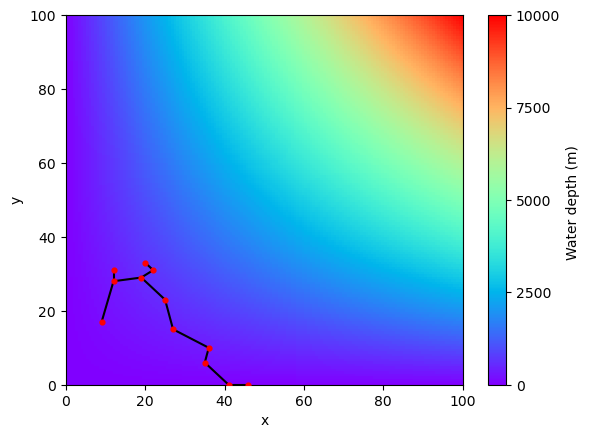

Simulation 2 of 148
Fitness score: -45069
Wind angle: 90
Number of turbines: 12

Generations: 100
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


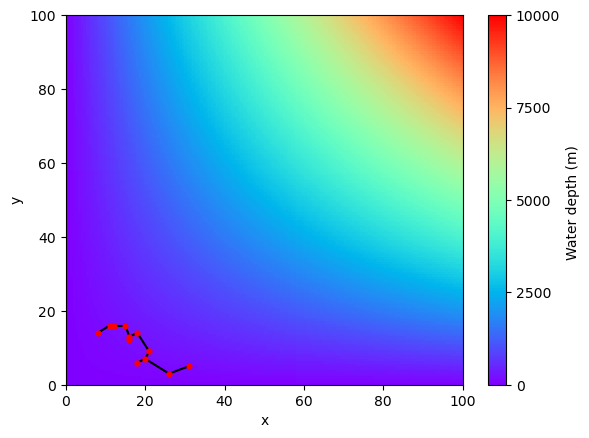

Simulation 3 of 148
Fitness score: -51378
Wind angle: 180
Number of turbines: 12

Generations: 100
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


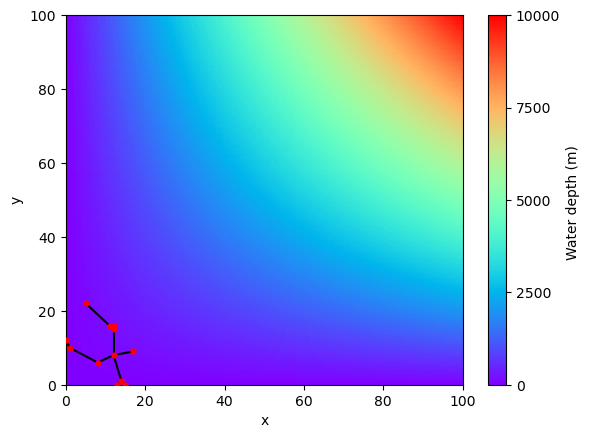

Simulation 4 of 148
Fitness score: -68953
Wind angle: 180
Number of turbines: 12

Generations: 100
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


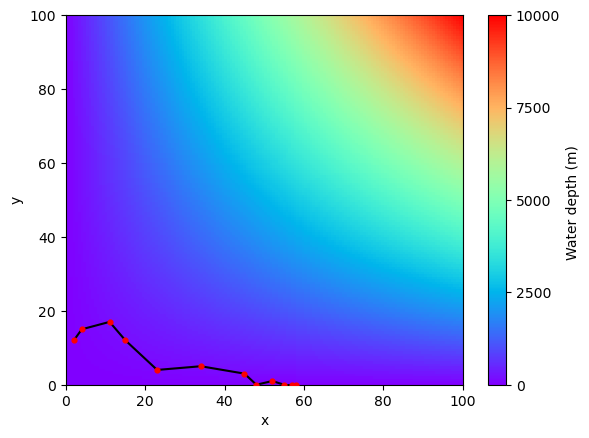

Simulation 5 of 148
Fitness score: -77748
Wind angle: 0
Number of turbines: 12

Generations: 100
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


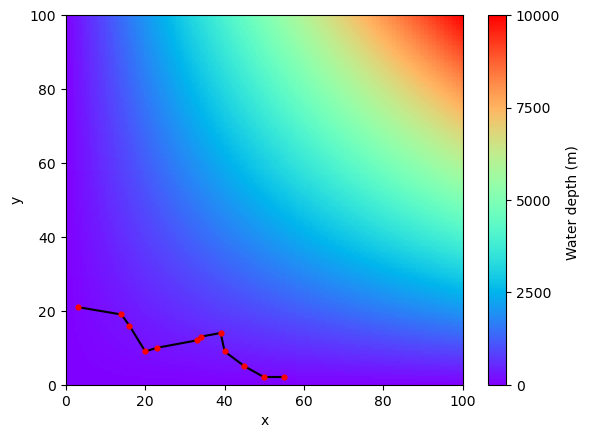

Simulation 6 of 148
Fitness score: -55570
Wind angle: 45
Number of turbines: 12

Generations: 100
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


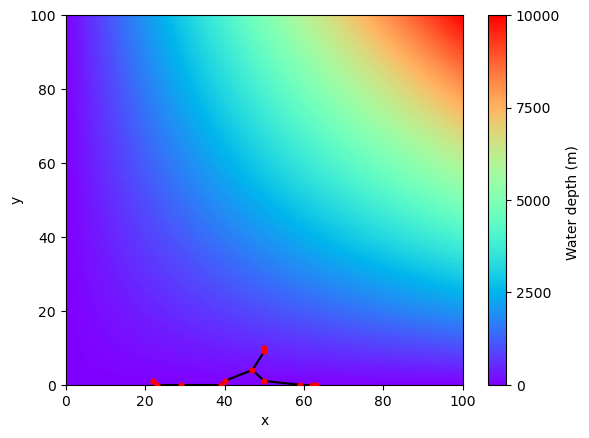

Simulation 7 of 148
Fitness score: -44266
Wind angle: 45
Number of turbines: 12

Generations: 100
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


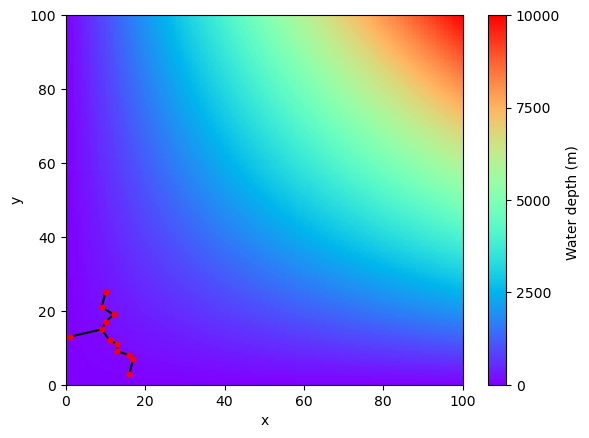

Simulation 8 of 148
Fitness score: -60007
Wind angle: 45
Number of turbines: 12

Generations: 100
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


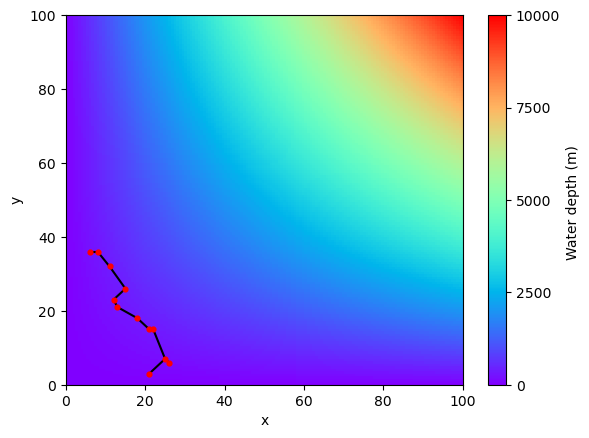

Simulation 9 of 148
Fitness score: -48030
Wind angle: 45
Number of turbines: 12

Generations: 100
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


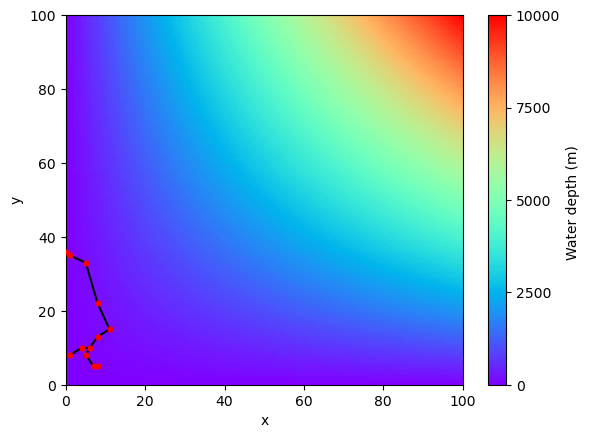

Simulation 10 of 148
Fitness score: -90061
Wind angle: 45
Number of turbines: 12

Generations: 100
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


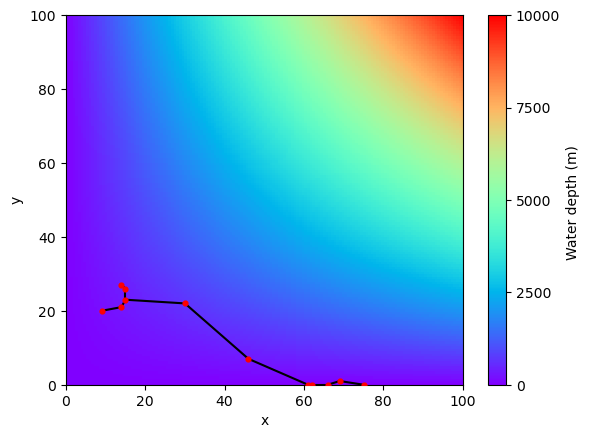

Simulation 11 of 148
Fitness score: -57075
Wind angle: 45
Number of turbines: 12

Generations: 100
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


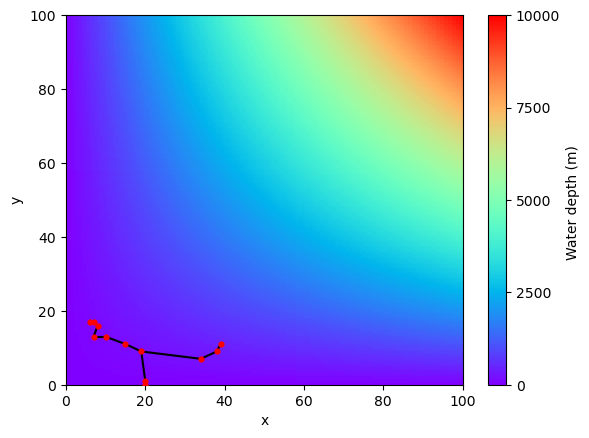

Simulation 12 of 148
Fitness score: -58038
Wind angle: 45
Number of turbines: 12

Generations: 100
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


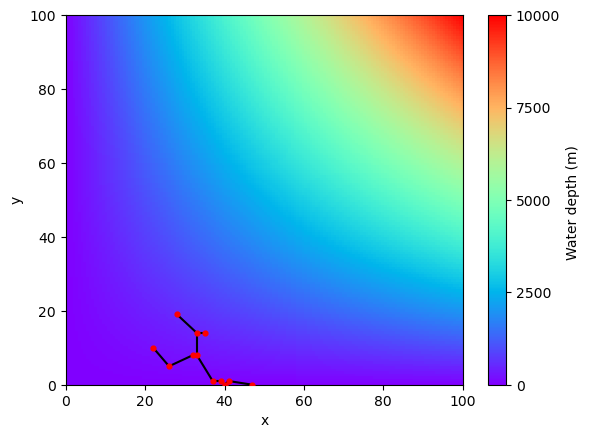

Simulation 13 of 148
Fitness score: -77465
Wind angle: 45
Number of turbines: 12

Generations: 100
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


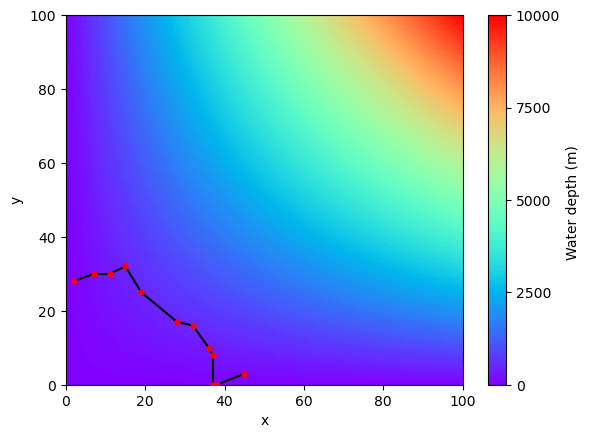

Simulation 14 of 148
Fitness score: -7000
Wind angle: 45
Number of turbines: 3

Generations: 10
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


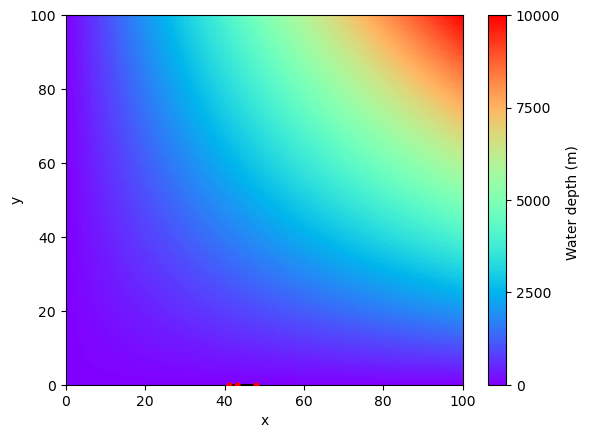

Simulation 15 of 148
Fitness score: -8000
Wind angle: 45
Number of turbines: 3

Generations: 2
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


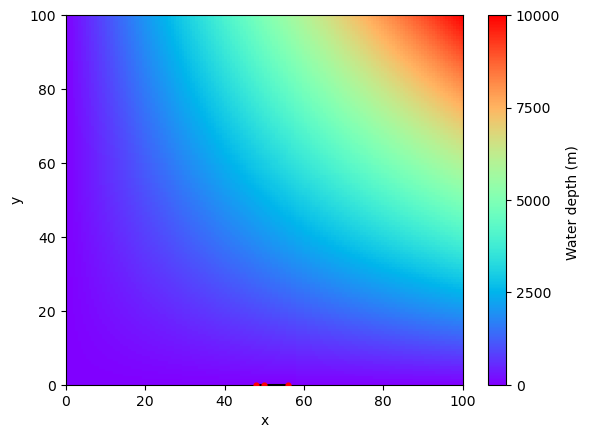

Simulation 16 of 148
Fitness score: -273800
Wind angle: 45
Number of turbines: 8

Generations: 2
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


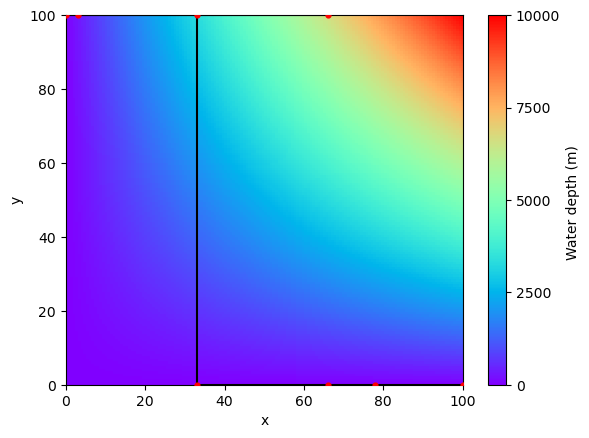

Simulation 17 of 148
Fitness score: -907084
Wind angle: 45
Number of turbines: 50

Generations: 2
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


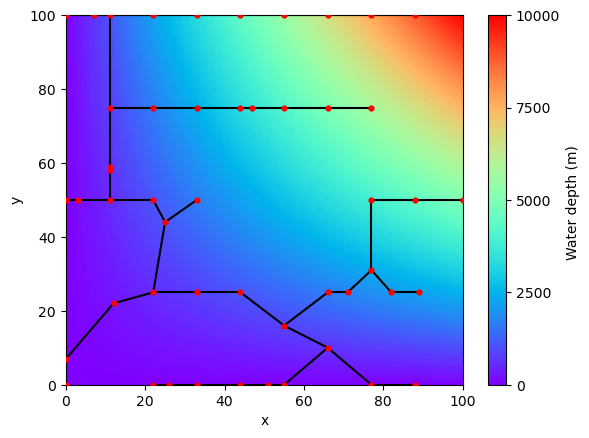

Simulation 18 of 148
Fitness score: -928431
Wind angle: 45
Number of turbines: 50

Generations: 2
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


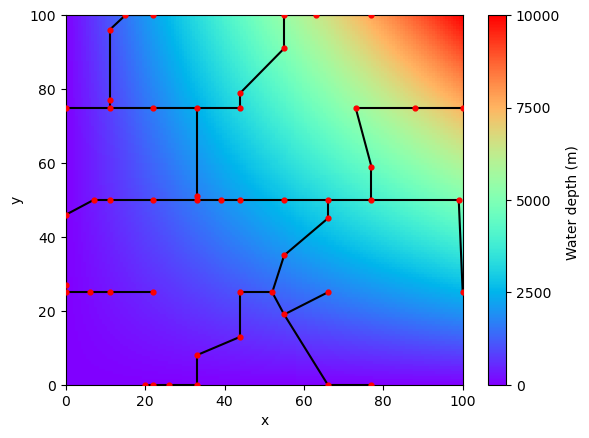

Simulation 19 of 148
Fitness score: -980580
Wind angle: 45
Number of turbines: 50

Generations: 1
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


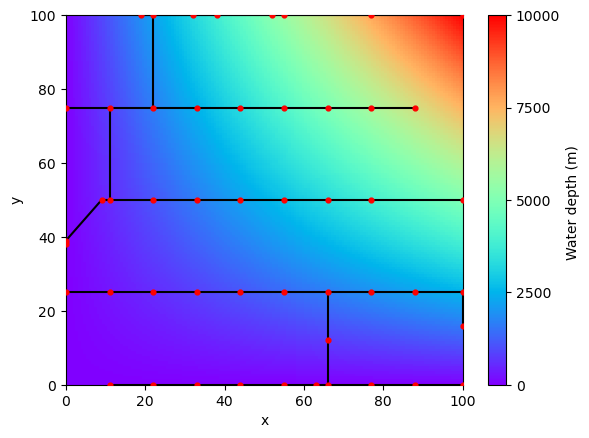

Simulation 20 of 148
Fitness score: -1018496
Wind angle: 45
Number of turbines: 50

Generations: 1
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


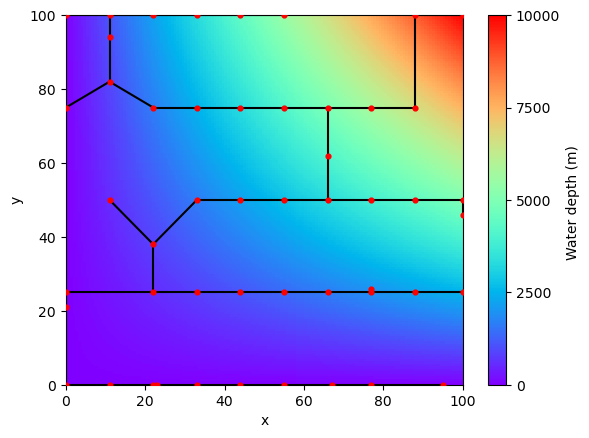

Simulation 21 of 148
Fitness score: -1007880
Wind angle: 45
Number of turbines: 50

Generations: 1
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


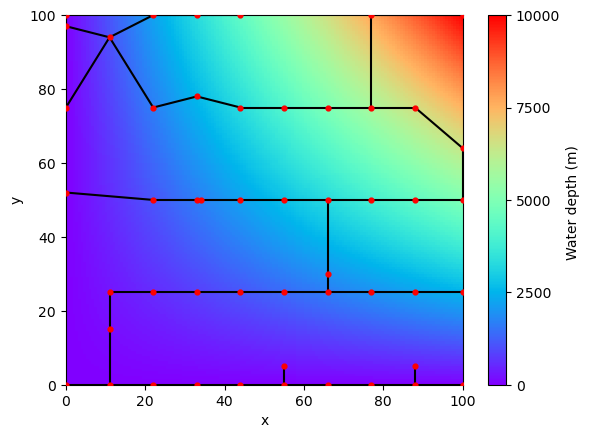

Simulation 22 of 148
Fitness score: -990740
Wind angle: 45
Number of turbines: 50

Generations: 1
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


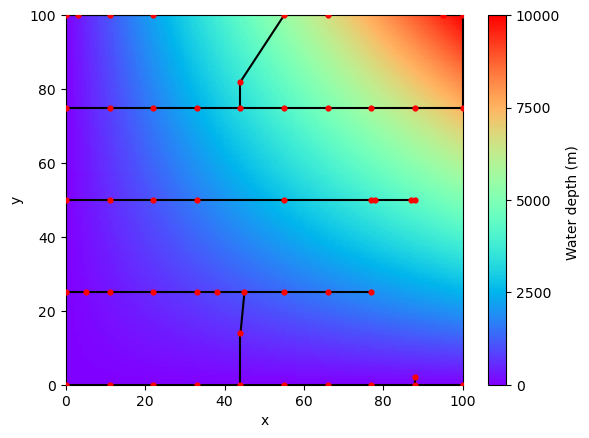

Simulation 23 of 148
Fitness score: -1002071
Wind angle: 45
Number of turbines: 50

Generations: 1
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


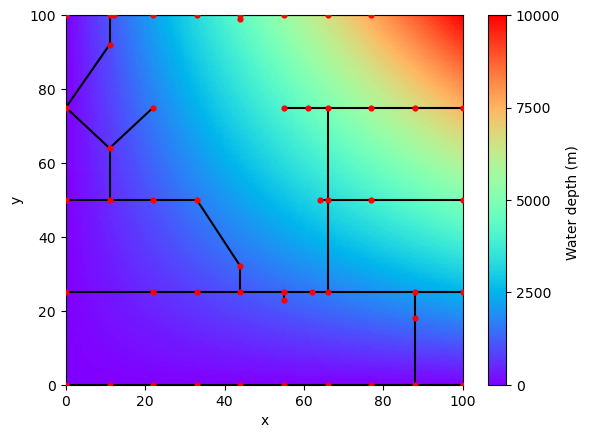

Simulation 24 of 148
Fitness score: -1041892
Wind angle: 45
Number of turbines: 50

Generations: 1
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


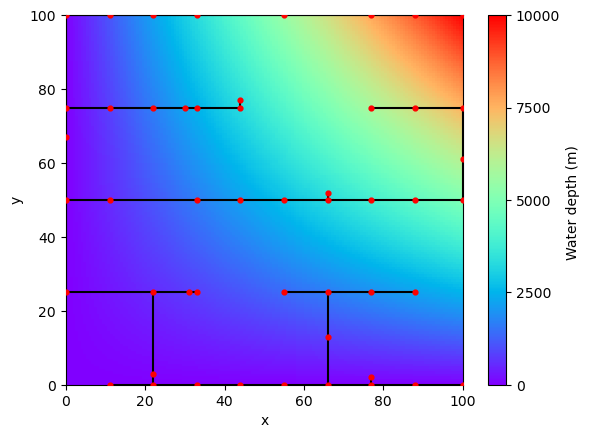

Simulation 25 of 148
Fitness score: -50000
Wind angle: 45
Number of turbines: 3

Generations: 1
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


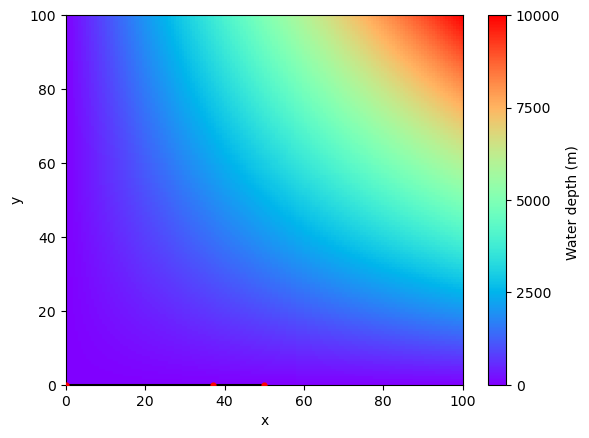

Simulation 26 of 148
Fitness score: -8832
Wind angle: 45
Number of turbines: 3

Generations: 6
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


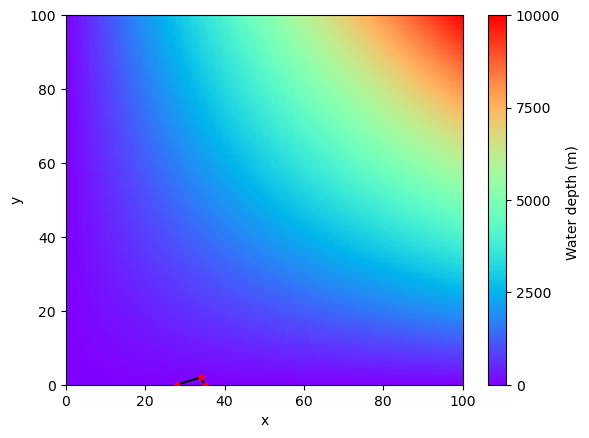

Simulation 27 of 148
Fitness score: -5000
Wind angle: 0
Number of turbines: 3

Generations: 6
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


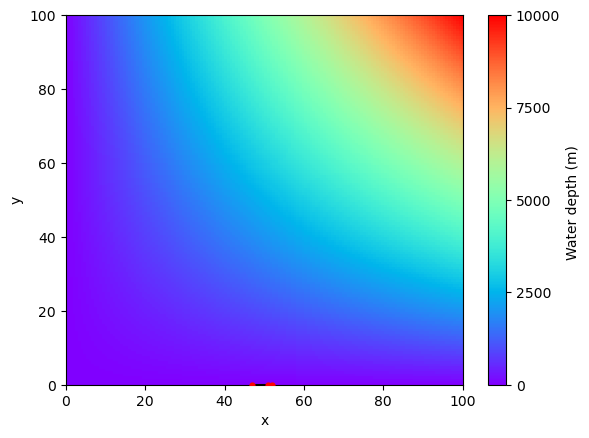

Simulation 28 of 148
Fitness score: -3000
Wind angle: 180
Number of turbines: 3

Generations: 6
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


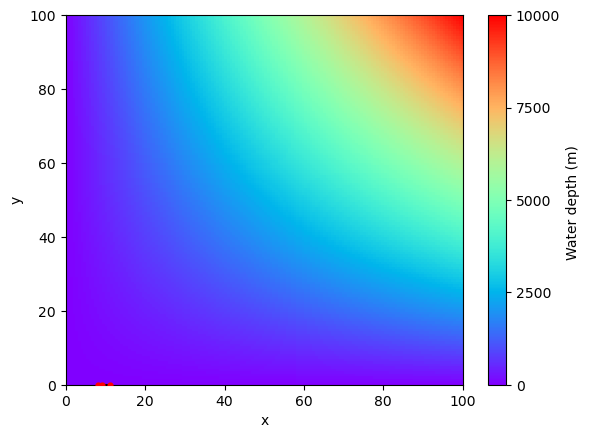

Simulation 29 of 148
Fitness score: -6000
Wind angle: 180
Number of turbines: 3

Generations: 6
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


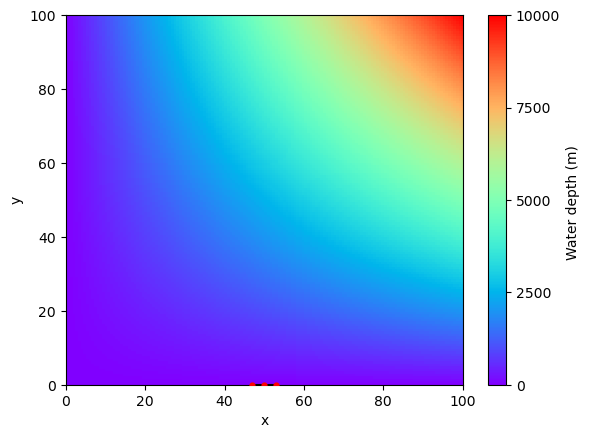

Simulation 30 of 148
Fitness score: -11000
Wind angle: 180
Number of turbines: 3

Generations: 6
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


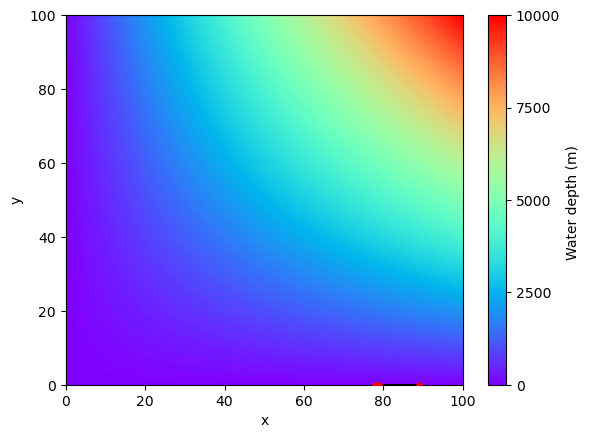

Simulation 31 of 148
Fitness score: -2000
Wind angle: 180
Number of turbines: 3

Generations: 6
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


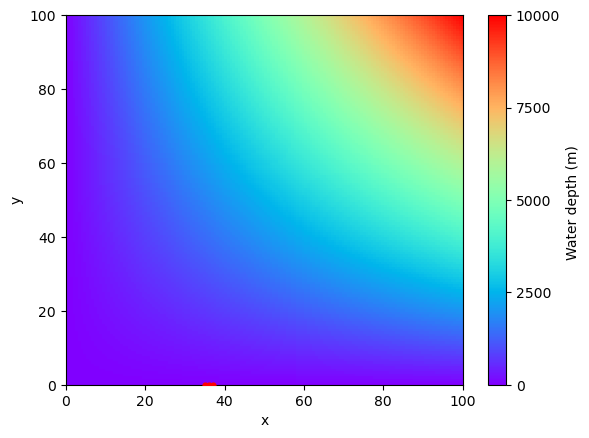

Simulation 32 of 148
Fitness score: -8263
Wind angle: 180
Number of turbines: 3

Generations: 6
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


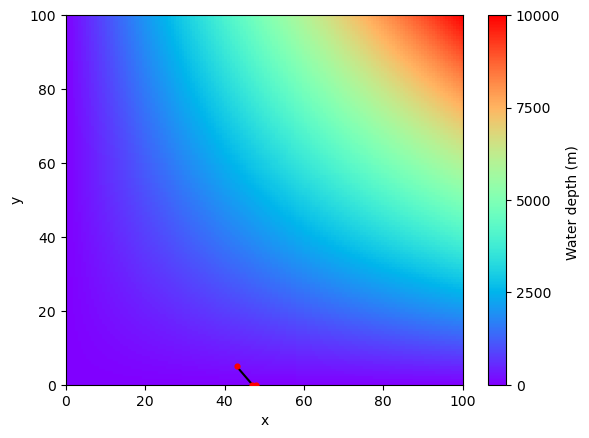

Simulation 33 of 148
Fitness score: -8000
Wind angle: 180
Number of turbines: 3

Generations: 6
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


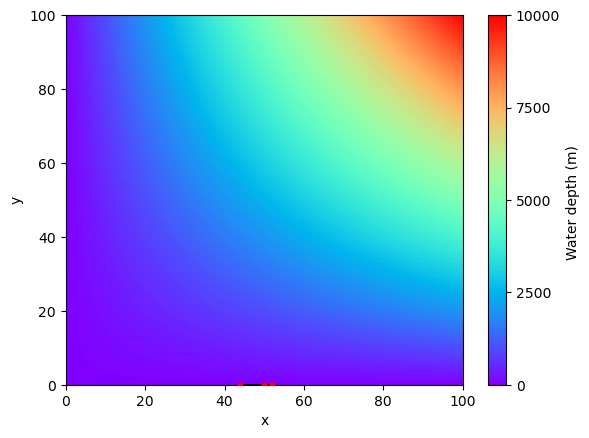

Simulation 34 of 148
Fitness score: -7000
Wind angle: 180
Number of turbines: 3

Generations: 6
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


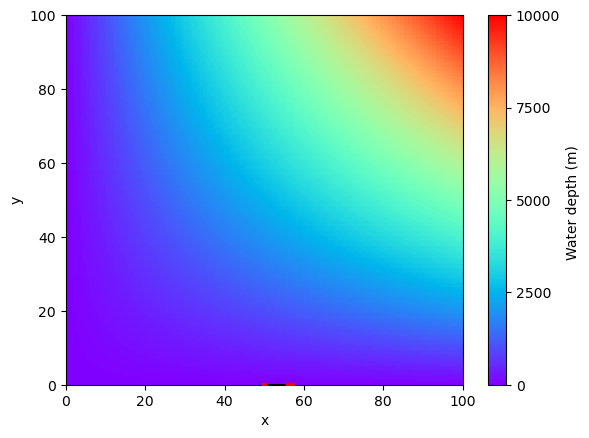

Simulation 35 of 148
Fitness score: -9000
Wind angle: 180
Number of turbines: 3

Generations: 6
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


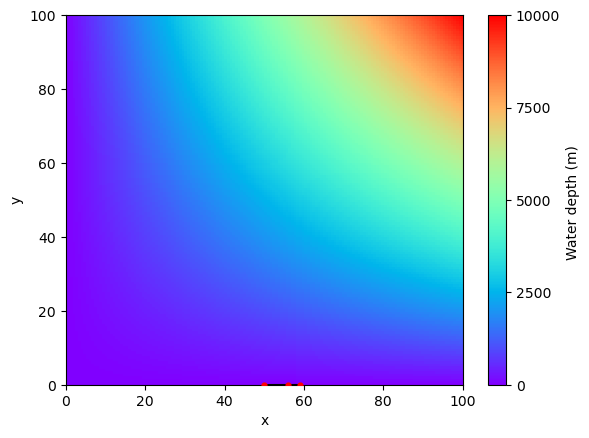

Simulation 36 of 148
Fitness score: -762777
Wind angle: 180
Number of turbines: 50

Generations: 6
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


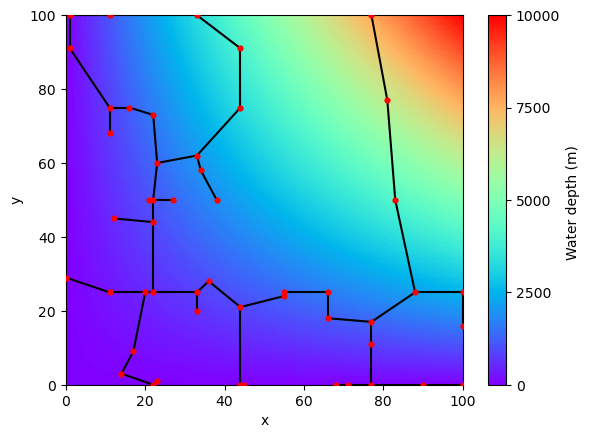

Simulation 37 of 148
Fitness score: -794774
Wind angle: 180
Number of turbines: 50

Generations: 6
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


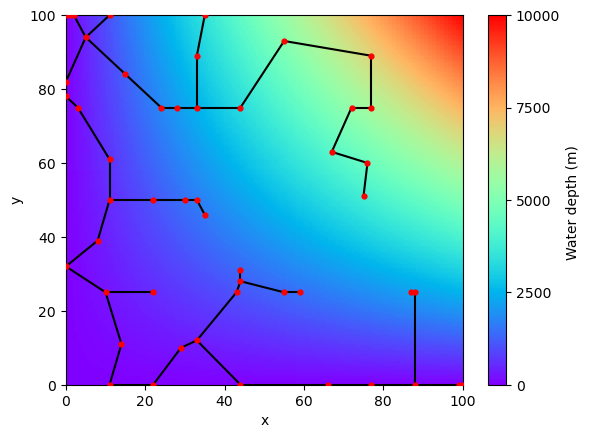

Simulation 38 of 148
Fitness score: -794617
Wind angle: 180
Number of turbines: 50

Generations: 6
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


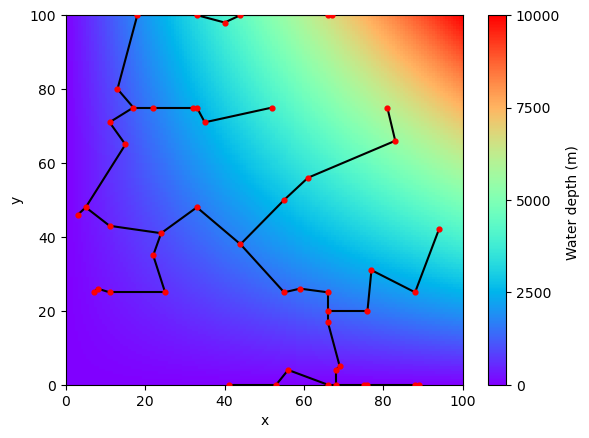

Simulation 39 of 148
Fitness score: -763231
Wind angle: 180
Number of turbines: 50

Generations: 6
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


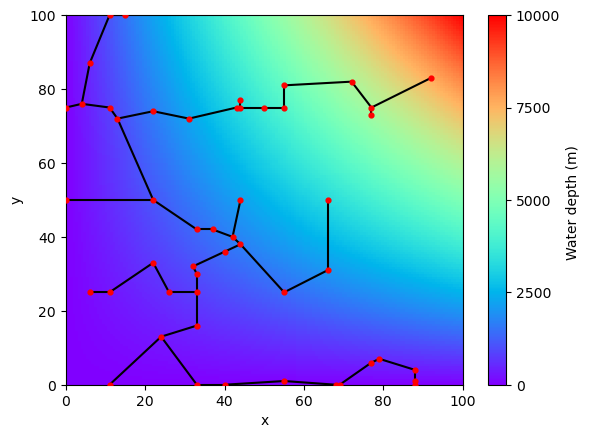

Simulation 40 of 148
Fitness score: -812054
Wind angle: 180
Number of turbines: 50

Generations: 6
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


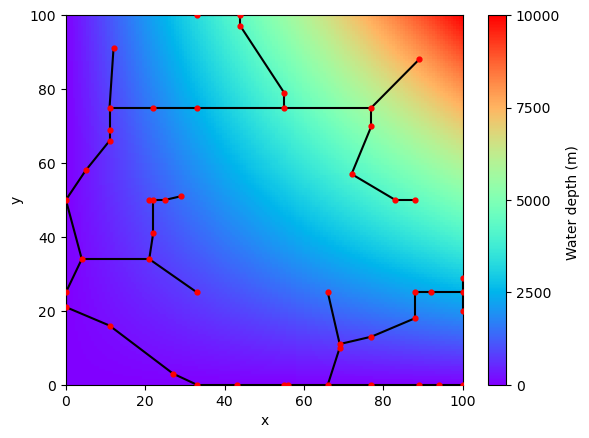

Simulation 41 of 148
Fitness score: -803323
Wind angle: 180
Number of turbines: 50

Generations: 6
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


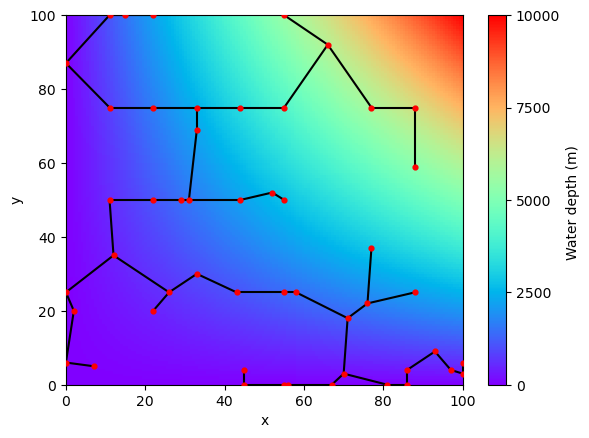

Simulation 42 of 148
Fitness score: -172509
Wind angle: 180
Number of turbines: 8

Generations: 6
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


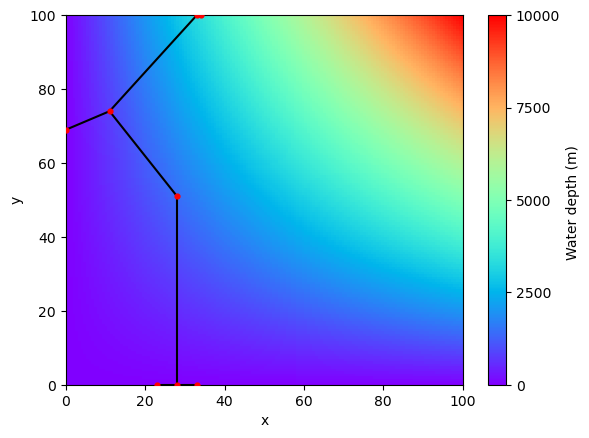

Simulation 43 of 148
Fitness score: -158993
Wind angle: 180
Number of turbines: 8

Generations: 6
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


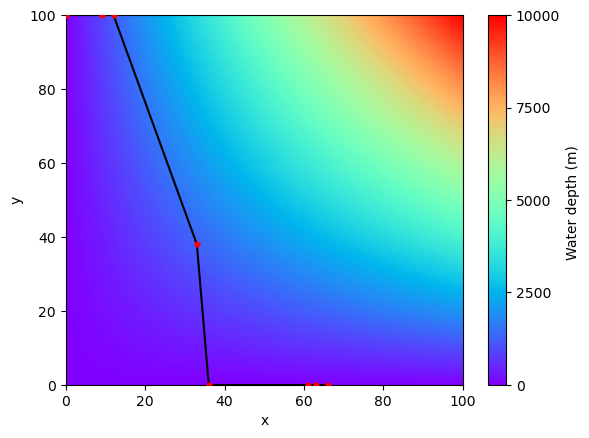

Simulation 44 of 148
Fitness score: -128271
Wind angle: 180
Number of turbines: 8

Generations: 6
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


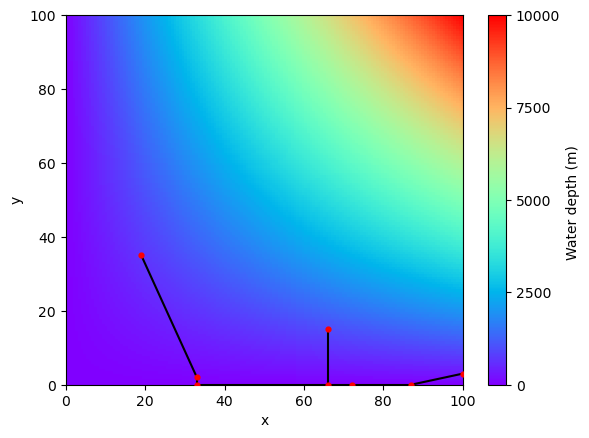

Simulation 45 of 148
Fitness score: -179485
Wind angle: 180
Number of turbines: 8

Generations: 6
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


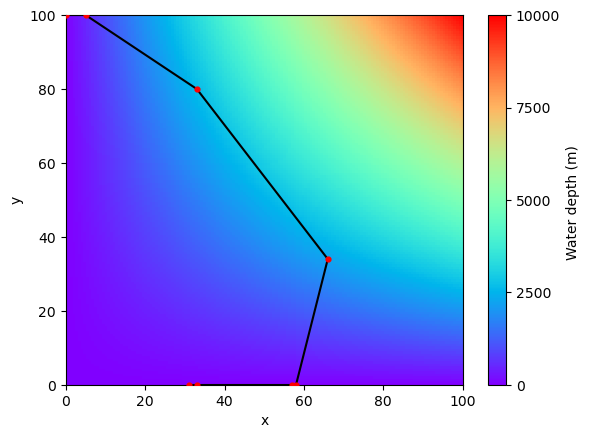

Simulation 46 of 148
Fitness score: -169191
Wind angle: 180
Number of turbines: 8

Generations: 6
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


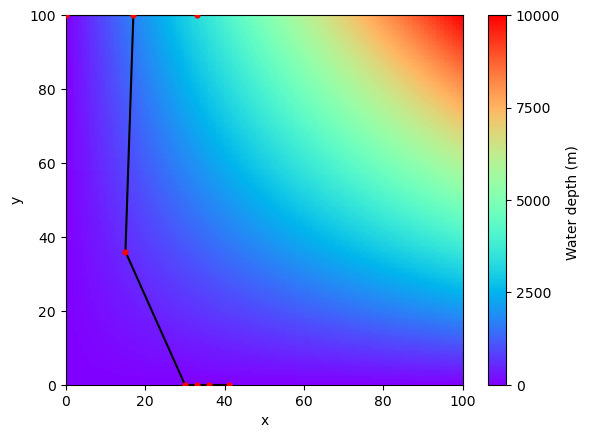

Simulation 47 of 148
Fitness score: -168305
Wind angle: 180
Number of turbines: 8

Generations: 6
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


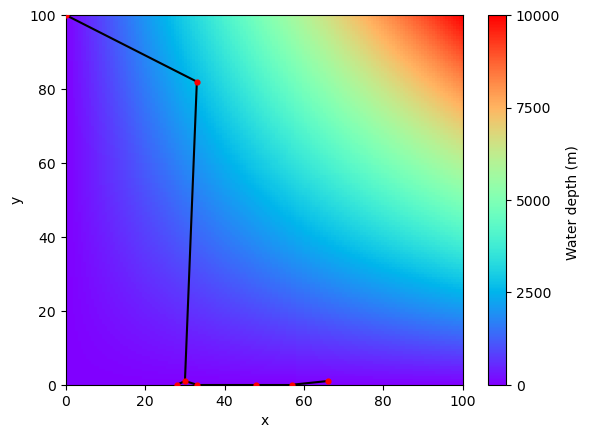

Simulation 48 of 148
Fitness score: -25587
Wind angle: 180
Number of turbines: 5

Generations: 6
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


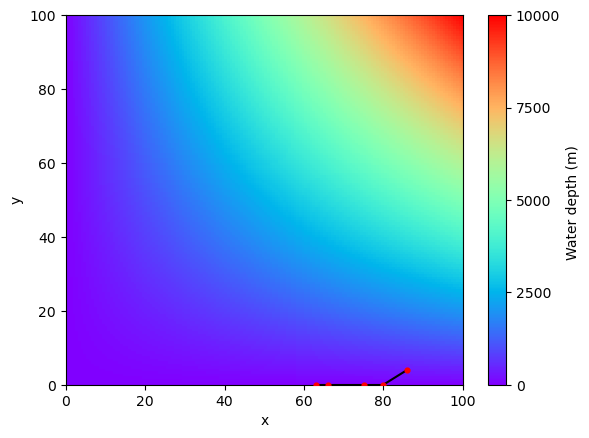

Simulation 49 of 148
Fitness score: -31000
Wind angle: 180
Number of turbines: 5

Generations: 6
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


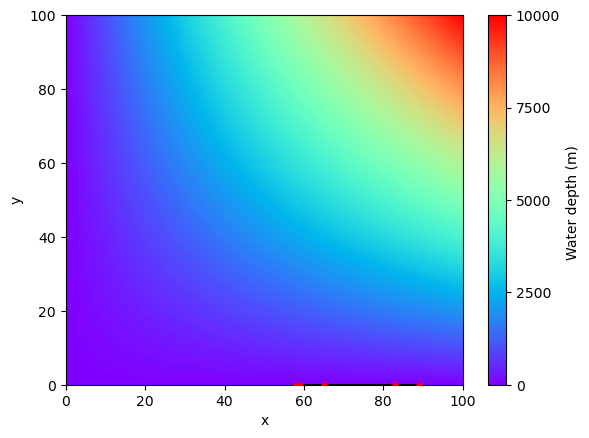

Simulation 50 of 148
Fitness score: -26000
Wind angle: 180
Number of turbines: 5

Generations: 6
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


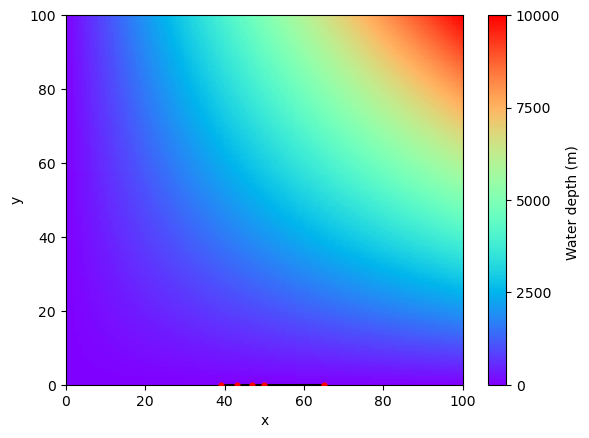

Simulation 51 of 148
Fitness score: -28000
Wind angle: 180
Number of turbines: 5

Generations: 6
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


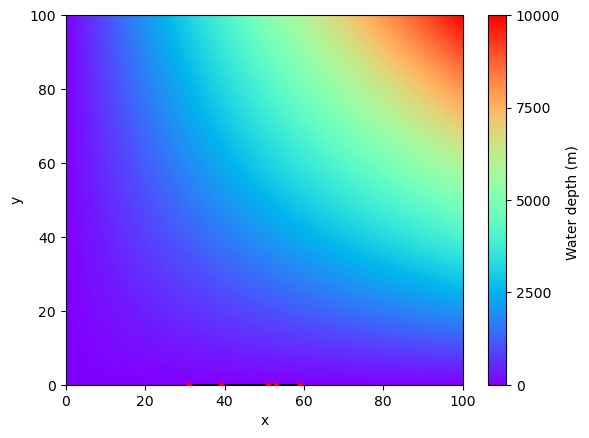

Simulation 52 of 148
Fitness score: -22000
Wind angle: 180
Number of turbines: 5

Generations: 6
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


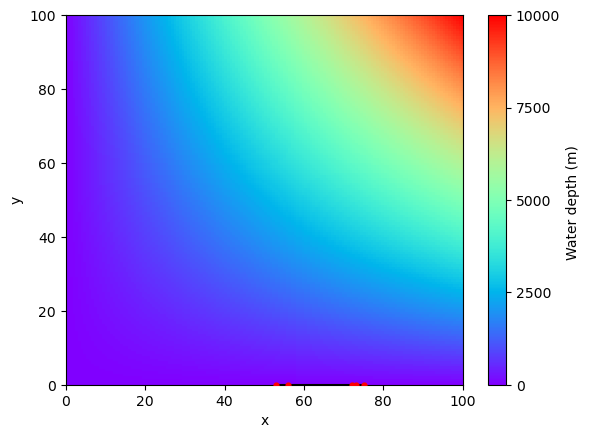

Simulation 53 of 148
Fitness score: -24492
Wind angle: 180
Number of turbines: 5

Generations: 6
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


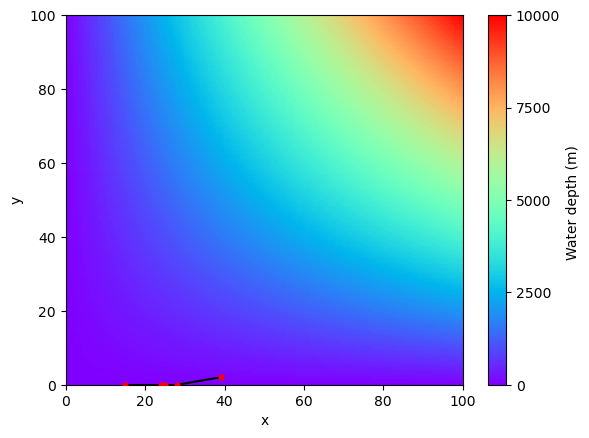

Simulation 54 of 148
Fitness score: -26000
Wind angle: 180
Number of turbines: 5

Generations: 6
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


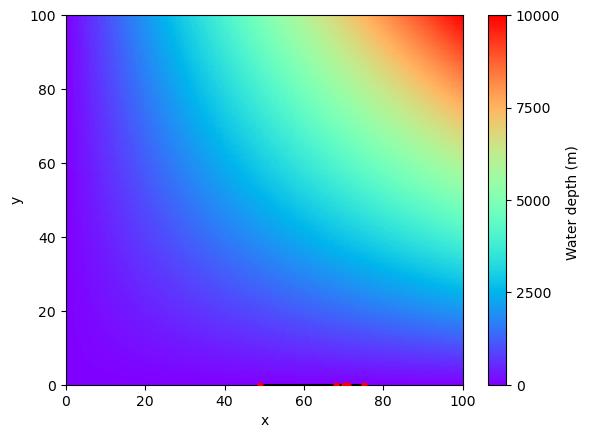

Simulation 55 of 148
Fitness score: -19000
Wind angle: 180
Number of turbines: 5

Generations: 6
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


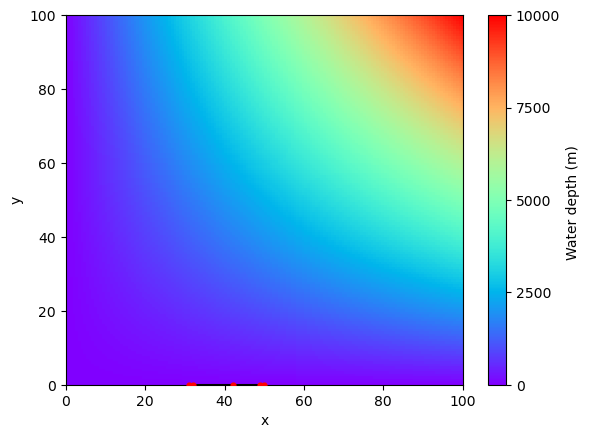

Simulation 56 of 148
Fitness score: -23000
Wind angle: 180
Number of turbines: 5

Generations: 6
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


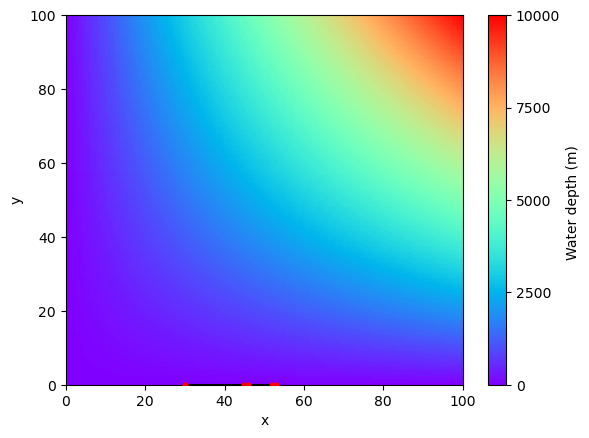

Simulation 57 of 148
Fitness score: -24000
Wind angle: 180
Number of turbines: 5

Generations: 6
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


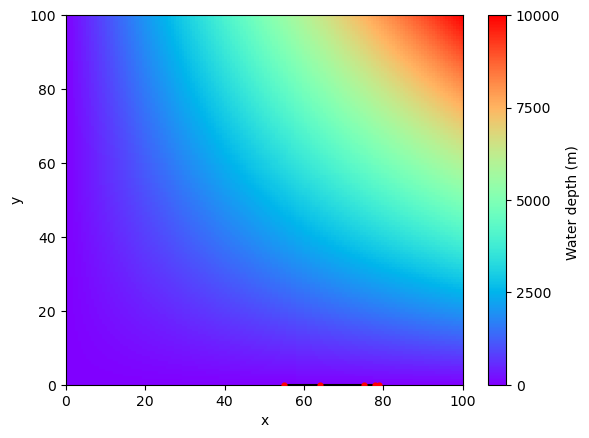

Simulation 58 of 148
Fitness score: -12000
Wind angle: 180
Number of turbines: 5

Generations: 6
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


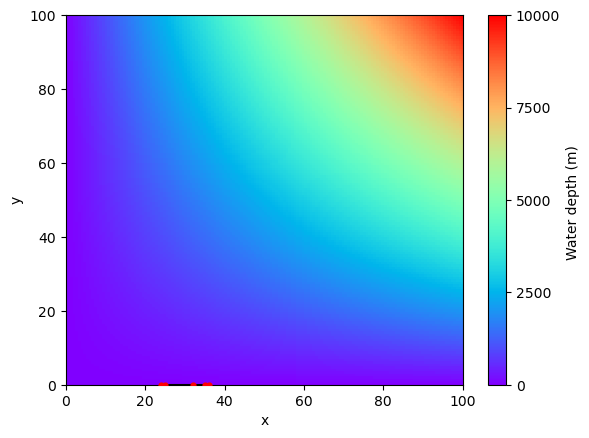

Simulation 59 of 148
Fitness score: -22000
Wind angle: 180
Number of turbines: 5

Generations: 6
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


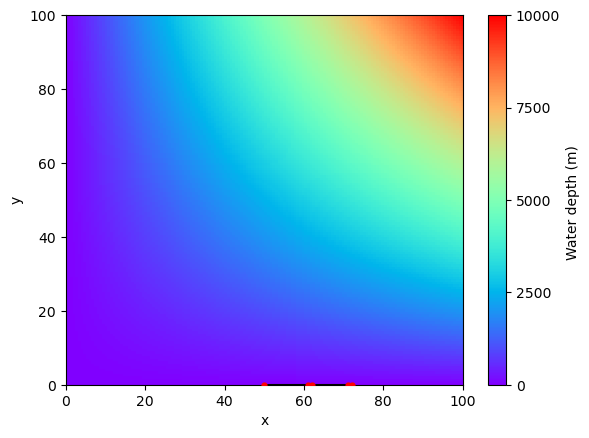

Simulation 60 of 148
Fitness score: -13000
Wind angle: 180
Number of turbines: 5

Generations: 6
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


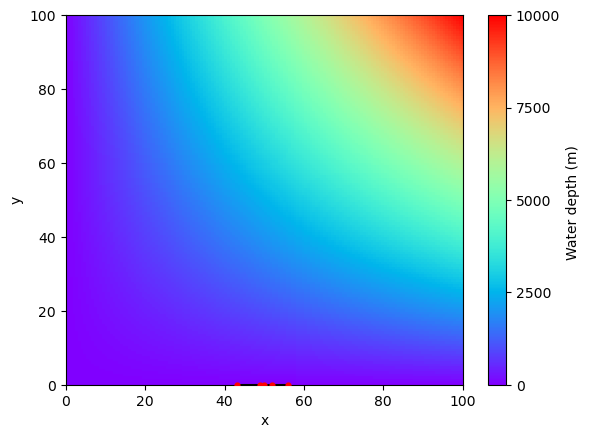

Simulation 61 of 148
Fitness score: -18000
Wind angle: 180
Number of turbines: 5

Generations: 6
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


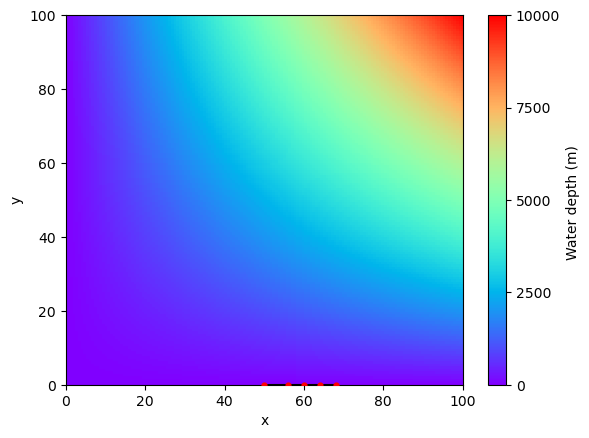

Simulation 62 of 148
Fitness score: -17000
Wind angle: 180
Number of turbines: 5

Generations: 6
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


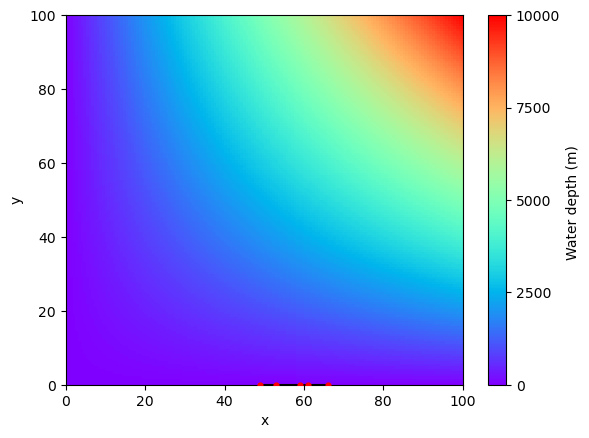

Simulation 63 of 148
Fitness score: -26000
Wind angle: 180
Number of turbines: 5

Generations: 6
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


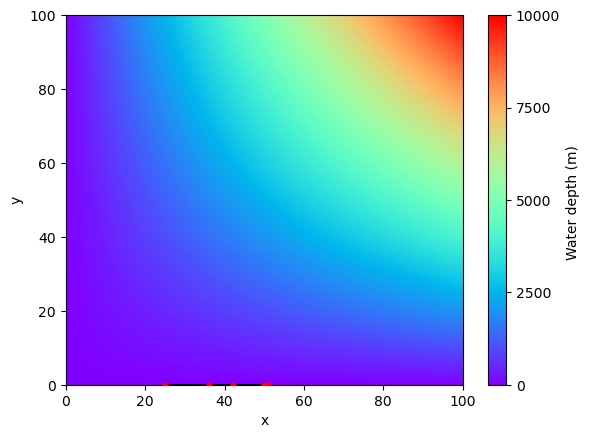

Simulation 64 of 148
Fitness score: -18000
Wind angle: 180
Number of turbines: 5

Generations: 6
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


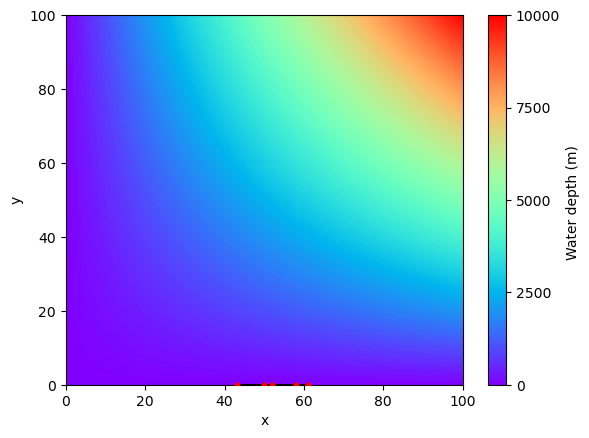

Simulation 65 of 148
Fitness score: -25000
Wind angle: 180
Number of turbines: 5

Generations: 6
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


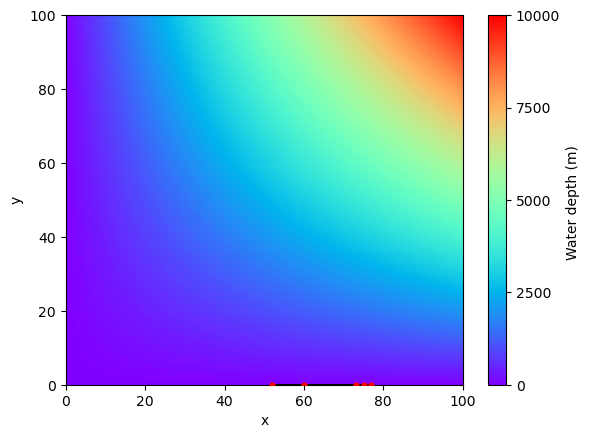

Simulation 66 of 148
Fitness score: -13000
Wind angle: 180
Number of turbines: 5

Generations: 6
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


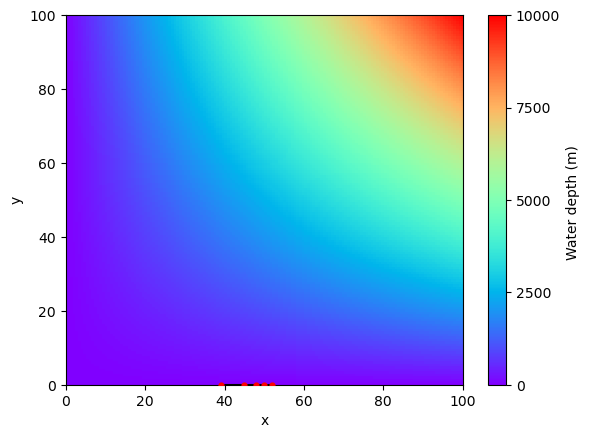

Simulation 67 of 148
Fitness score: -17000
Wind angle: 180
Number of turbines: 5

Generations: 6
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


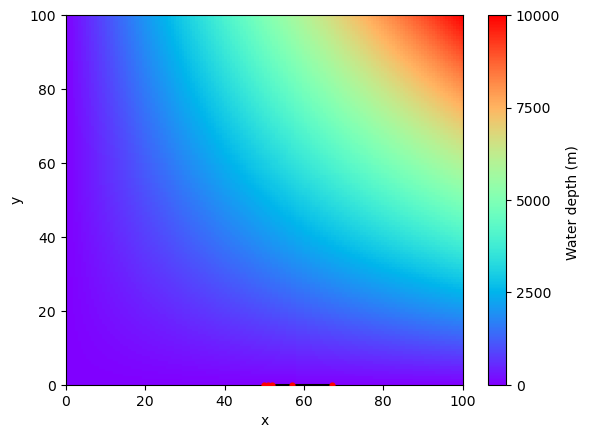

Simulation 68 of 148
Fitness score: -20826
Wind angle: 180
Number of turbines: 5

Generations: 6
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


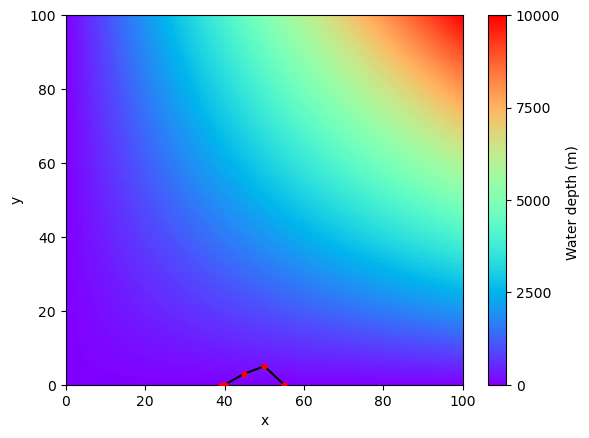

Simulation 69 of 148
Fitness score: -13000
Wind angle: 180
Number of turbines: 5

Generations: 6
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


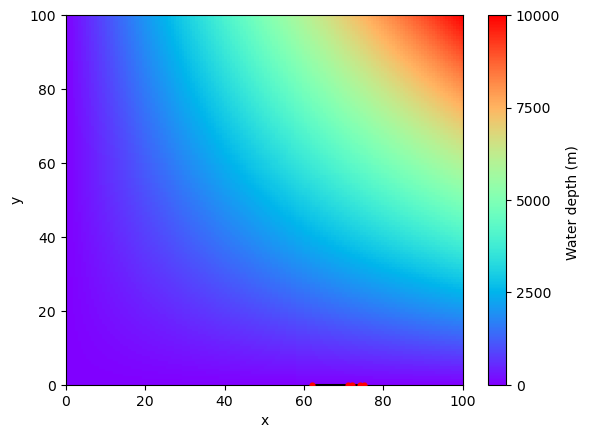

Simulation 70 of 148
Fitness score: -13000
Wind angle: 180
Number of turbines: 5

Generations: 6
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


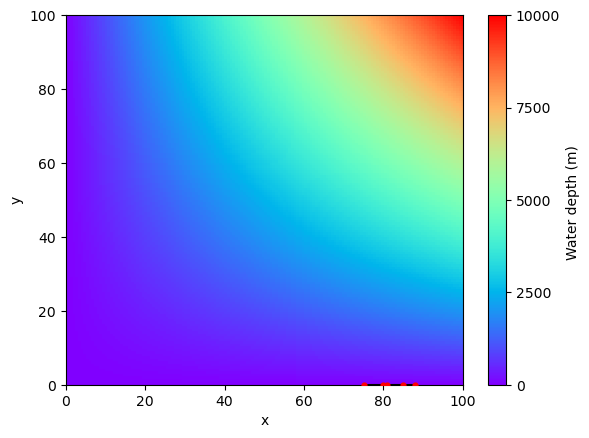

Simulation 71 of 148
Fitness score: -18000
Wind angle: 180
Number of turbines: 5

Generations: 6
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


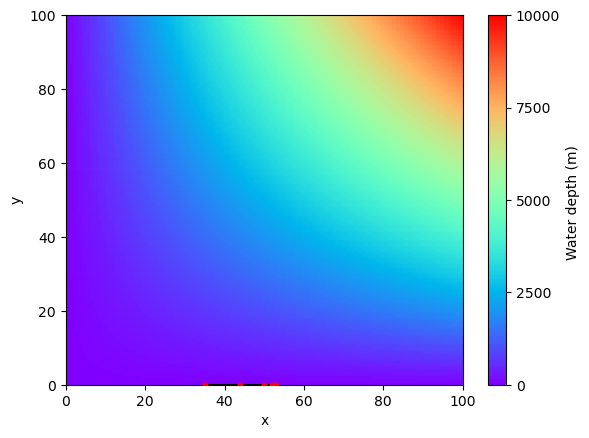

Simulation 72 of 148
Fitness score: -20000
Wind angle: 180
Number of turbines: 5

Generations: 6
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


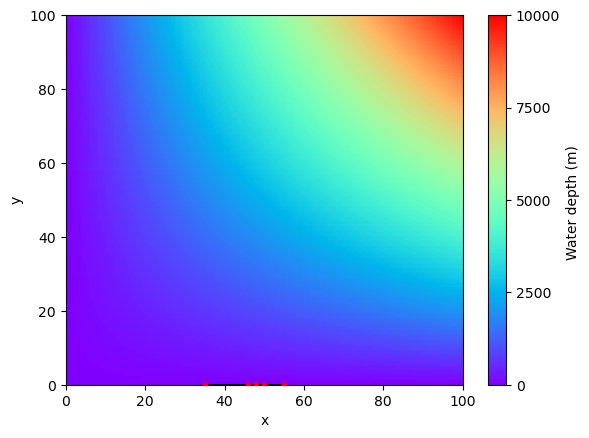

Simulation 73 of 148
Fitness score: -17000
Wind angle: 180
Number of turbines: 5

Generations: 6
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


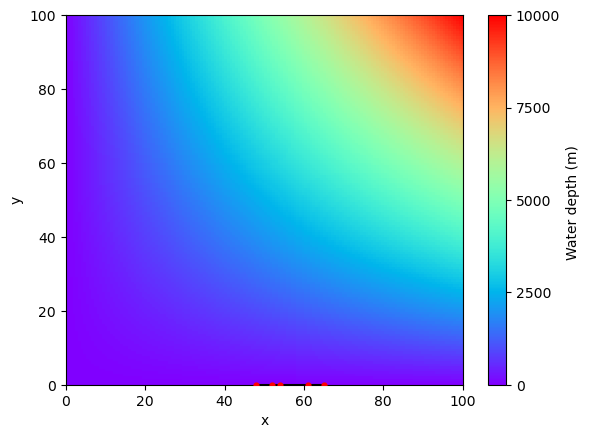

Simulation 74 of 148
Fitness score: -19000
Wind angle: 180
Number of turbines: 5

Generations: 6
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


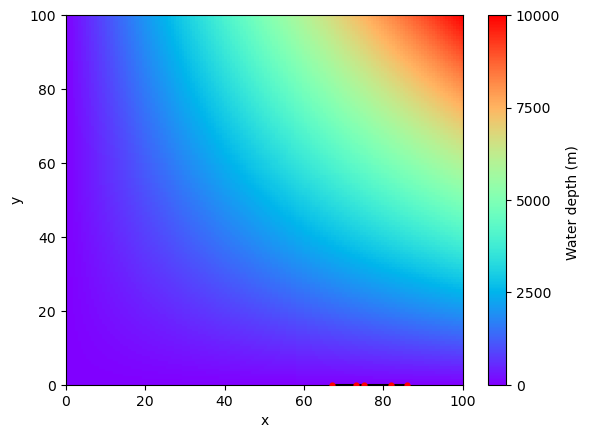

Simulation 75 of 148
Fitness score: -8000
Wind angle: 180
Number of turbines: 5

Generations: 6
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


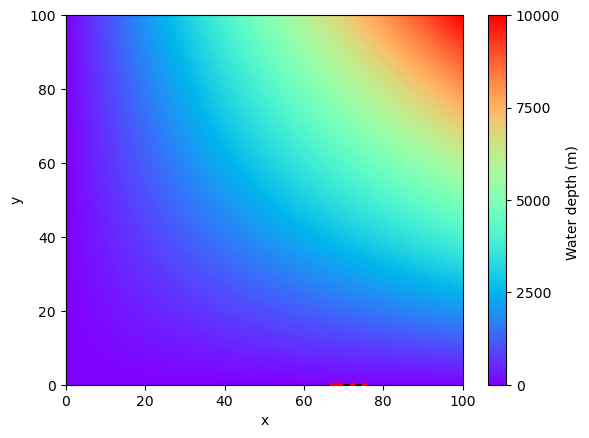

Simulation 76 of 148
Fitness score: -28000
Wind angle: 180
Number of turbines: 5

Generations: 6
Solutions per generation: 50
Parents mating: 10
Parents kept: 8
Mutation percentage: 10


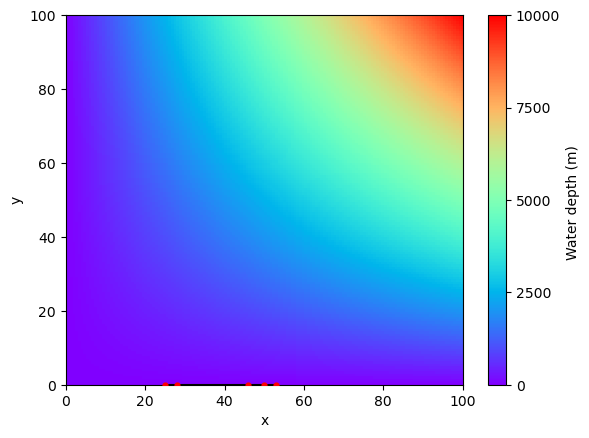

Simulation 77 of 148
Fitness score: -76000
Wind angle: 180
Number of turbines: 5

Generations: 6
Solutions per generation: 2
Parents mating: 1
Parents kept: 1
Mutation percentage: 10


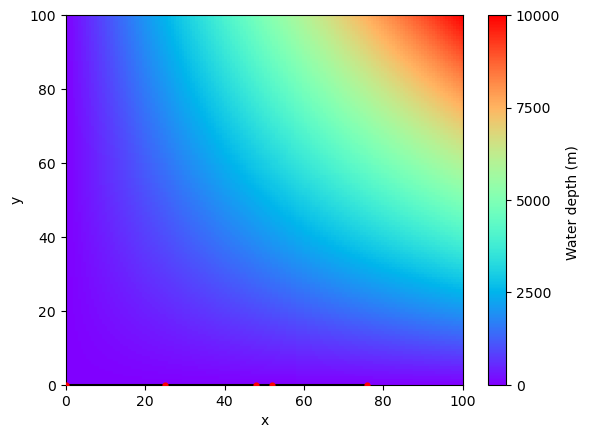

Simulation 78 of 148
Fitness score: -100000
Wind angle: 180
Number of turbines: 5

Generations: 6
Solutions per generation: 2
Parents mating: 1
Parents kept: 1
Mutation percentage: 10


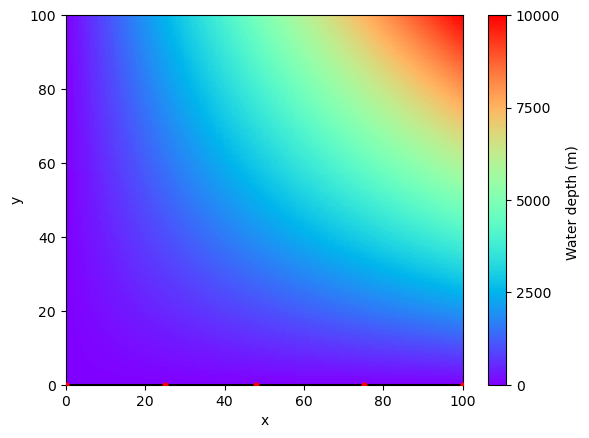

Simulation 79 of 148
Fitness score: -43000
Wind angle: 0
Number of turbines: 5

Generations: 6
Solutions per generation: 2
Parents mating: 1
Parents kept: 1
Mutation percentage: 10


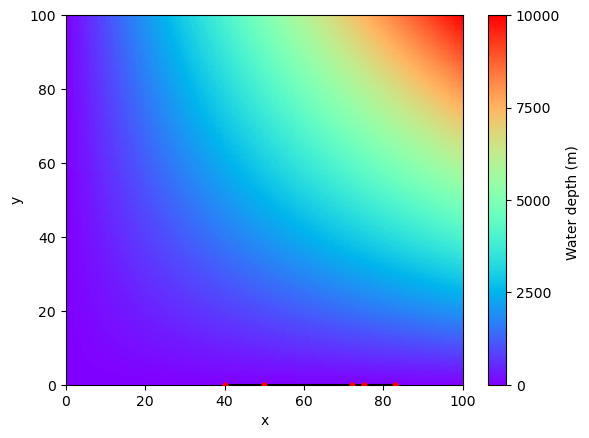

Simulation 80 of 148
Fitness score: -100000
Wind angle: 0
Number of turbines: 5

Generations: 3
Solutions per generation: 2
Parents mating: 1
Parents kept: 1
Mutation percentage: 10


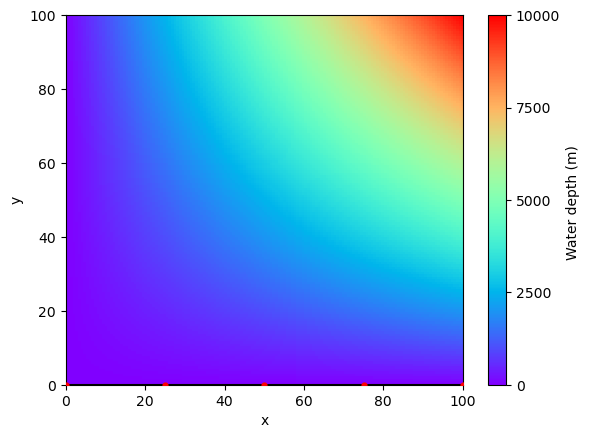

Simulation 81 of 148
Fitness score: -100000
Wind angle: 0
Number of turbines: 5

Generations: 3
Solutions per generation: 2
Parents mating: 1
Parents kept: 1
Mutation percentage: 10


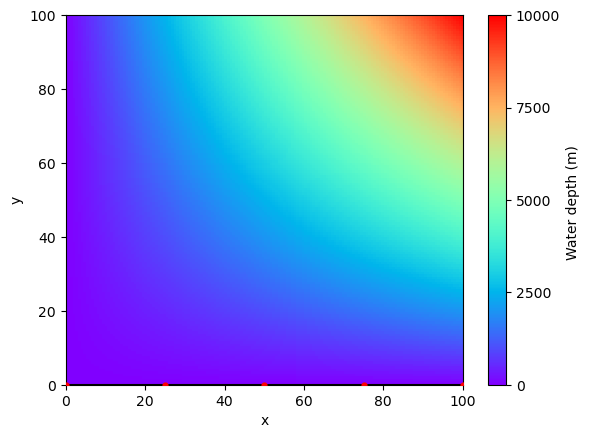

Simulation 82 of 148
Fitness score: -85000
Wind angle: 0
Number of turbines: 5

Generations: 3
Solutions per generation: 2
Parents mating: 1
Parents kept: 1
Mutation percentage: 10


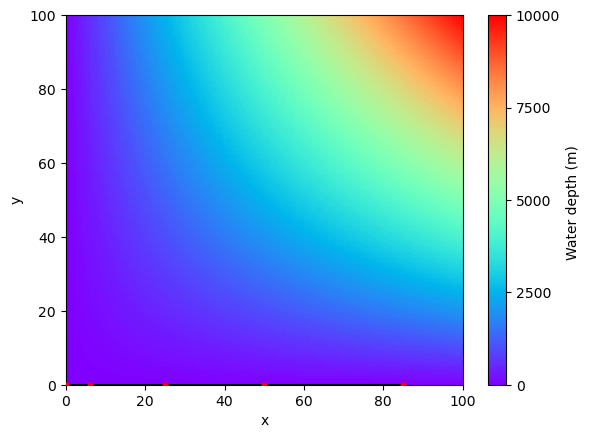

Simulation 83 of 148
Fitness score: -69000
Wind angle: 0
Number of turbines: 5

Generations: 3
Solutions per generation: 2
Parents mating: 1
Parents kept: 1
Mutation percentage: 10


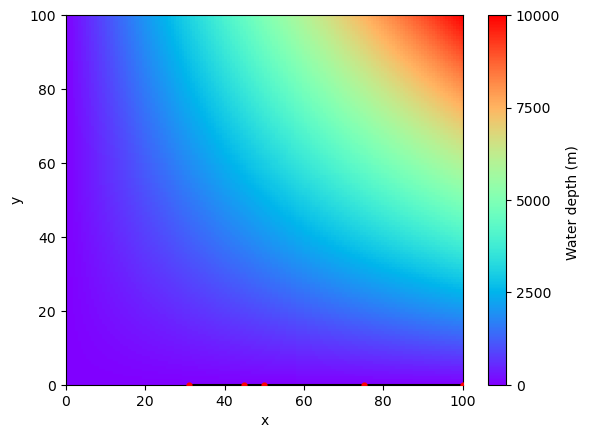

Simulation 84 of 148
Fitness score: -75000
Wind angle: 0
Number of turbines: 5

Generations: 3
Solutions per generation: 2
Parents mating: 1
Parents kept: 1
Mutation percentage: 10


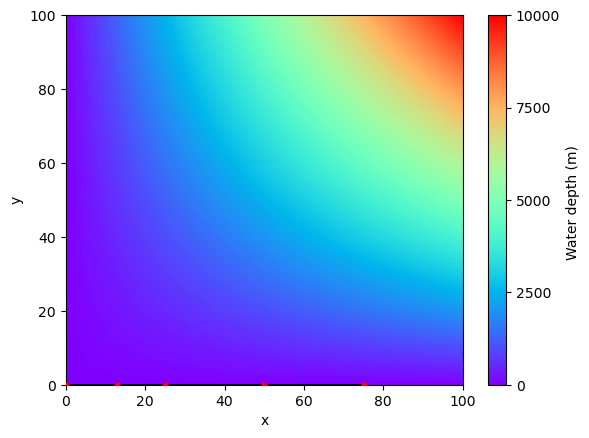

Simulation 85 of 148
Fitness score: -69000
Wind angle: 0
Number of turbines: 5

Generations: 3
Solutions per generation: 2
Parents mating: 1
Parents kept: 1
Mutation percentage: 10


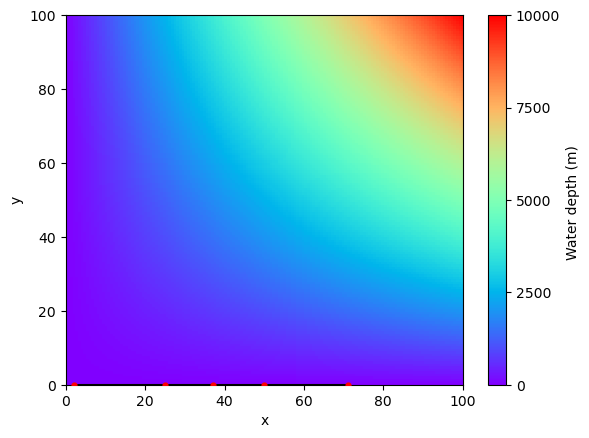

Simulation 86 of 148
Fitness score: -75000
Wind angle: 0
Number of turbines: 5

Generations: 3
Solutions per generation: 2
Parents mating: 1
Parents kept: 1
Mutation percentage: 10


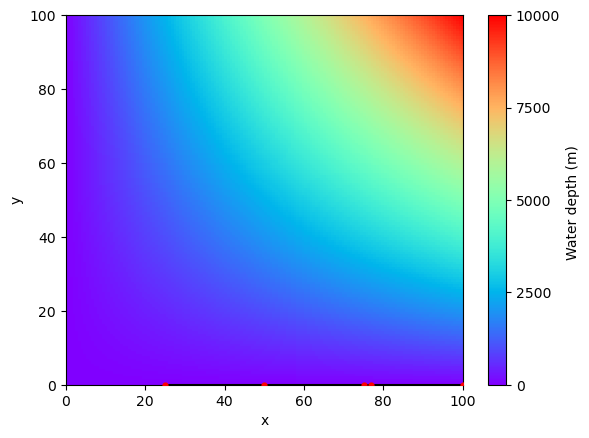

Simulation 87 of 148
Fitness score: -100000
Wind angle: 0
Number of turbines: 5

Generations: 3
Solutions per generation: 1
Parents mating: 1
Parents kept: 1
Mutation percentage: 10


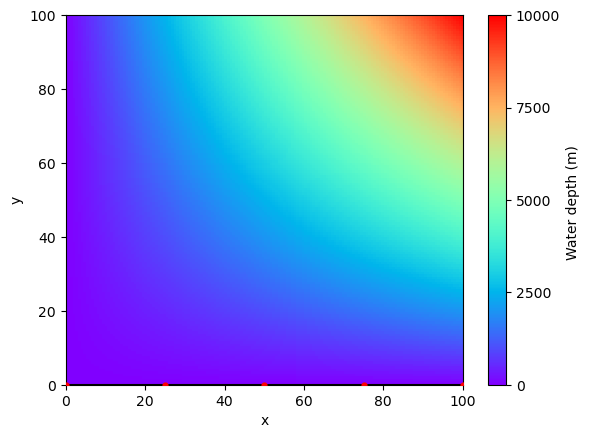

Simulation 88 of 148
Fitness score: -100000
Wind angle: 0
Number of turbines: 5

Generations: 3
Solutions per generation: 1
Parents mating: 1
Parents kept: 1
Mutation percentage: 10


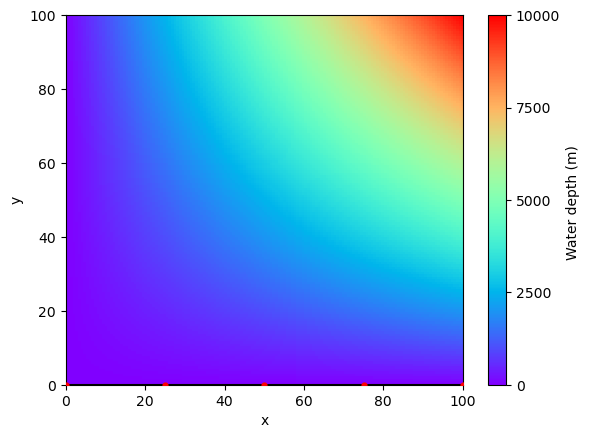

Simulation 89 of 148
Fitness score: -100000
Wind angle: 0
Number of turbines: 5

Generations: 5
Solutions per generation: 1
Parents mating: 1
Parents kept: 0
Mutation percentage: 10


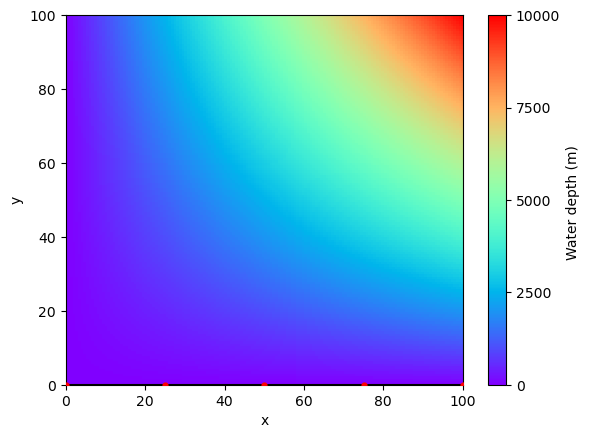

Simulation 90 of 148
Fitness score: -75000
Wind angle: 0
Number of turbines: 5

Generations: 5
Solutions per generation: 5
Parents mating: 1
Parents kept: 0
Mutation percentage: 10


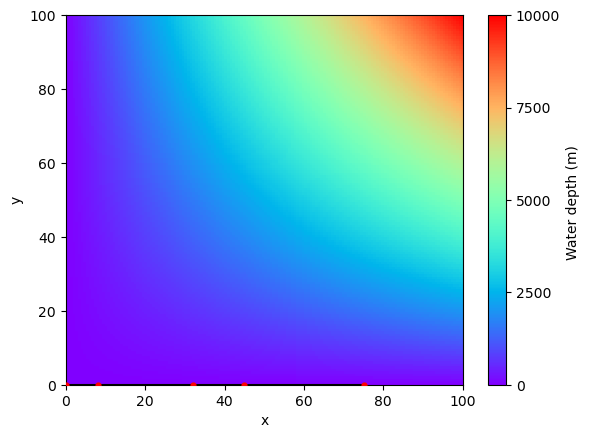

Simulation 91 of 148
Fitness score: 260752
Wind angle: 0
Number of turbines: 5

Generations: 5
Solutions per generation: 5
Parents mating: 1
Parents kept: 0
Mutation percentage: 10


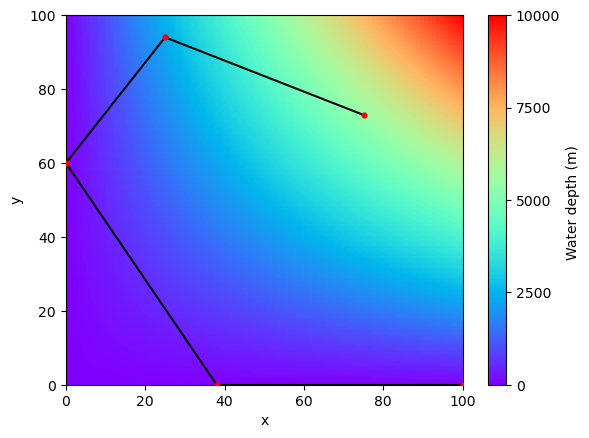

Simulation 92 of 148
Fitness score: -64000
Wind angle: 0
Number of turbines: 5

Generations: 5
Solutions per generation: 5
Parents mating: 1
Parents kept: 0
Mutation percentage: 10


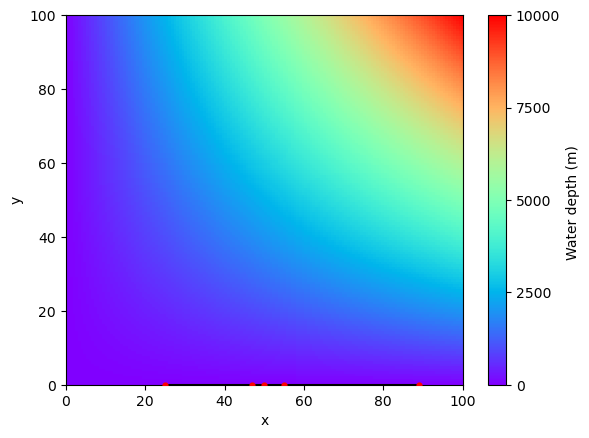

Simulation 93 of 148
Fitness score: -100000
Wind angle: 0
Number of turbines: 5

Generations: 5
Solutions per generation: 5
Parents mating: 1
Parents kept: 0
Mutation percentage: 10


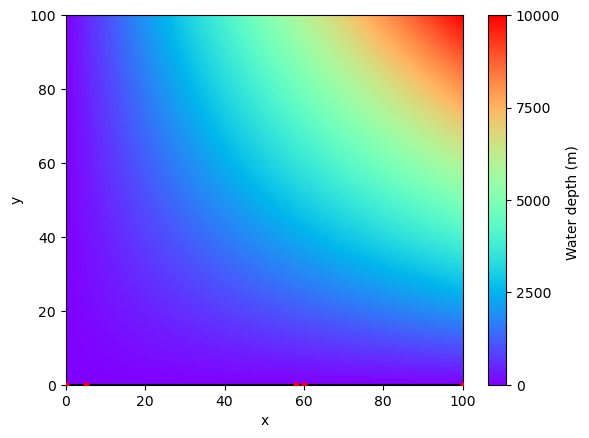

Simulation 94 of 148
Fitness score: -40000
Wind angle: 0
Number of turbines: 5

Generations: 5
Solutions per generation: 5
Parents mating: 1
Parents kept: 0
Mutation percentage: 10


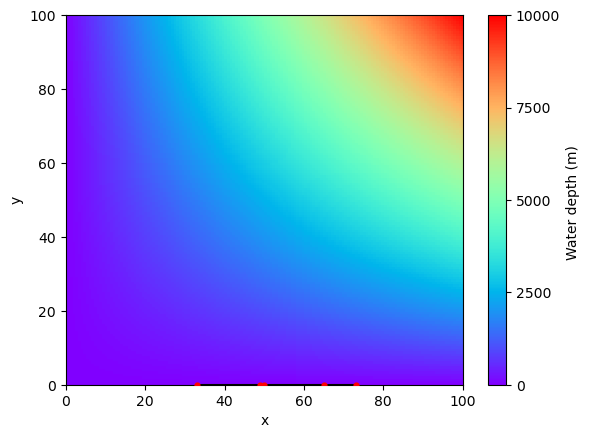

Simulation 95 of 148
Fitness score: -5000
Wind angle: 0
Number of turbines: 5

Generations: 200
Solutions per generation: 5
Parents mating: 1
Parents kept: 0
Mutation percentage: 10


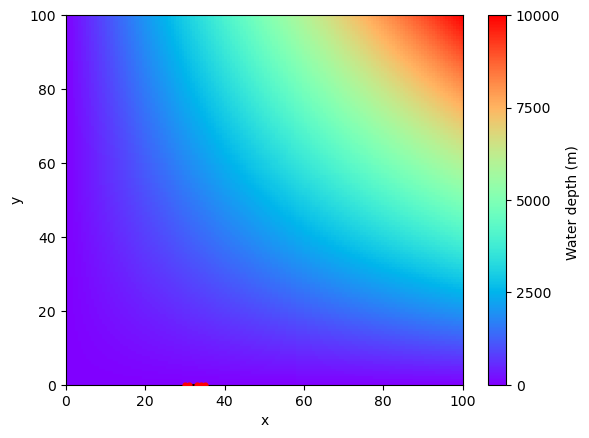

Simulation 96 of 148
Fitness score: -750120
Wind angle: 0
Number of turbines: 30

Generations: 3
Solutions per generation: 5
Parents mating: 1
Parents kept: 0
Mutation percentage: 10


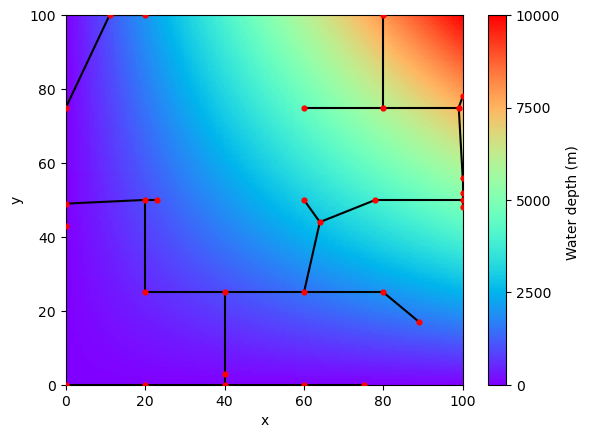

Simulation 97 of 148
Fitness score: -383686
Wind angle: 0
Number of turbines: 10

Generations: 3
Solutions per generation: 2
Parents mating: 1
Parents kept: 0
Mutation percentage: 10


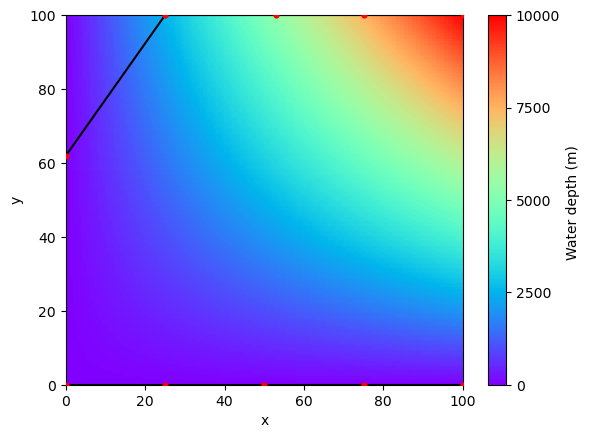

Simulation 98 of 148
Fitness score: -328801
Wind angle: 0
Number of turbines: 10

Generations: 3
Solutions per generation: 2
Parents mating: 1
Parents kept: 0
Mutation percentage: 10


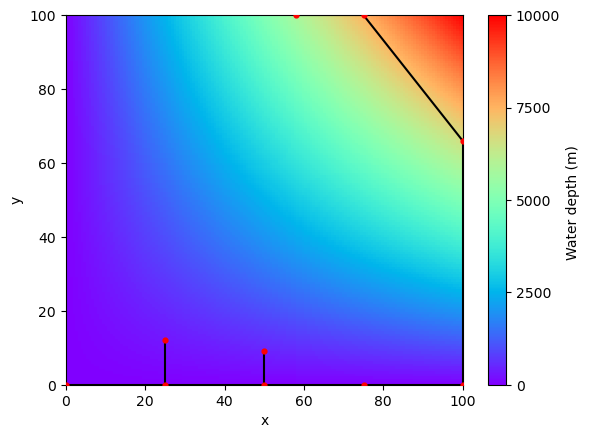

Simulation 99 of 148
Fitness score: -361409
Wind angle: 0
Number of turbines: 10

Generations: 3
Solutions per generation: 2
Parents mating: 1
Parents kept: 0
Mutation percentage: 10


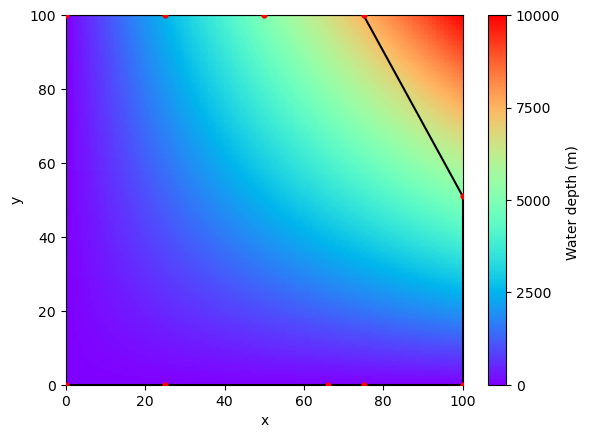

Simulation 100 of 148
Fitness score: -372077
Wind angle: 0
Number of turbines: 10

Generations: 3
Solutions per generation: 2
Parents mating: 1
Parents kept: 0
Mutation percentage: 10


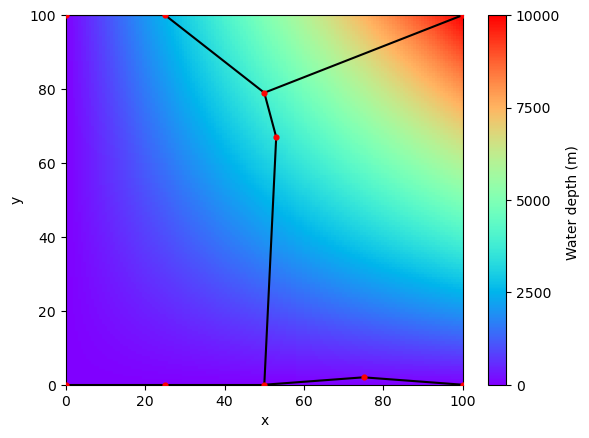

Simulation 101 of 148
Fitness score: -338811
Wind angle: 0
Number of turbines: 10

Generations: 3
Solutions per generation: 2
Parents mating: 1
Parents kept: 0
Mutation percentage: 10


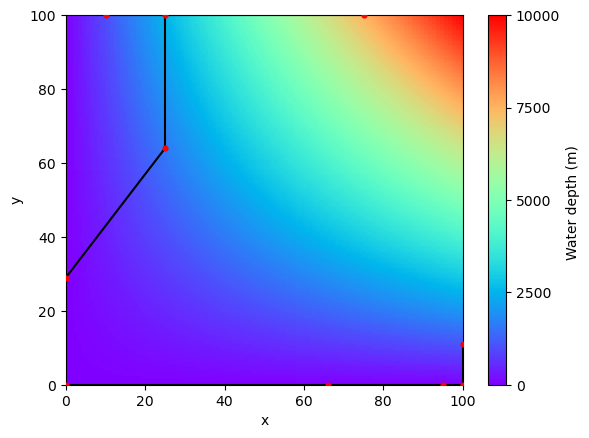

Simulation 102 of 148
Fitness score: -346560
Wind angle: 0
Number of turbines: 10

Generations: 3
Solutions per generation: 2
Parents mating: 1
Parents kept: 0
Mutation percentage: 10


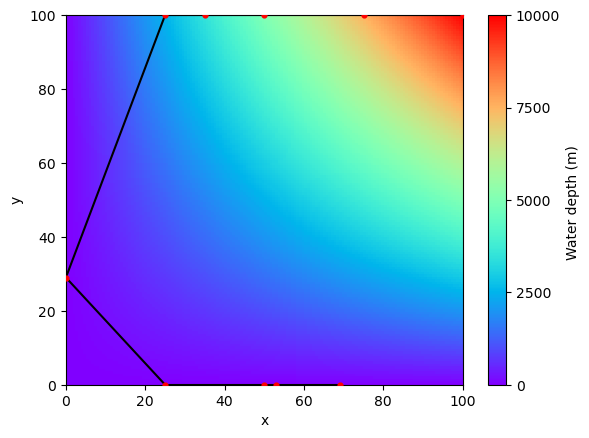

Simulation 103 of 148
Fitness score: -317991
Wind angle: 0
Number of turbines: 10

Generations: 3
Solutions per generation: 4
Parents mating: 1
Parents kept: 0
Mutation percentage: 10


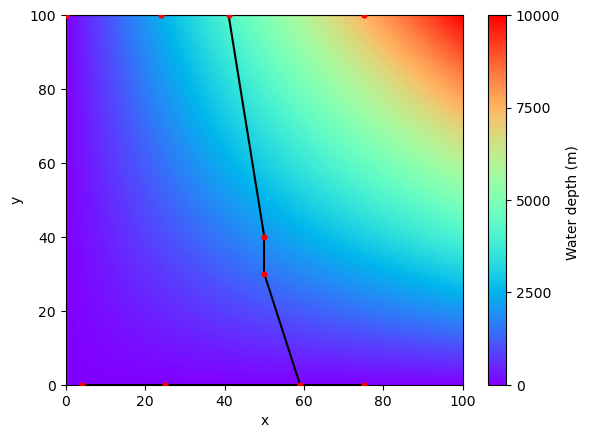

Simulation 104 of 148
Fitness score: -336505
Wind angle: 0
Number of turbines: 10

Generations: 3
Solutions per generation: 4
Parents mating: 1
Parents kept: 0
Mutation percentage: 10


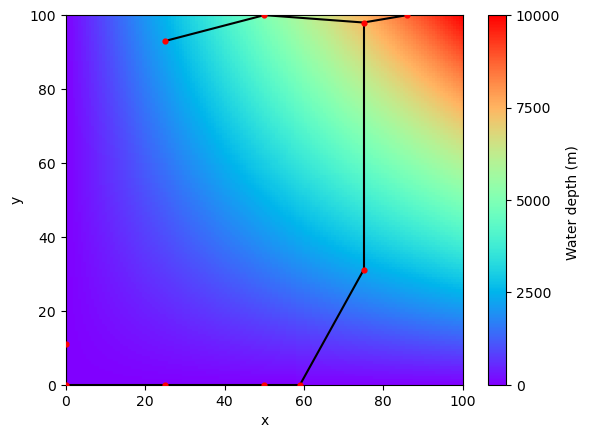

Simulation 105 of 148
Fitness score: -340791
Wind angle: 180
Number of turbines: 10

Generations: 3
Solutions per generation: 4
Parents mating: 1
Parents kept: 0
Mutation percentage: 10


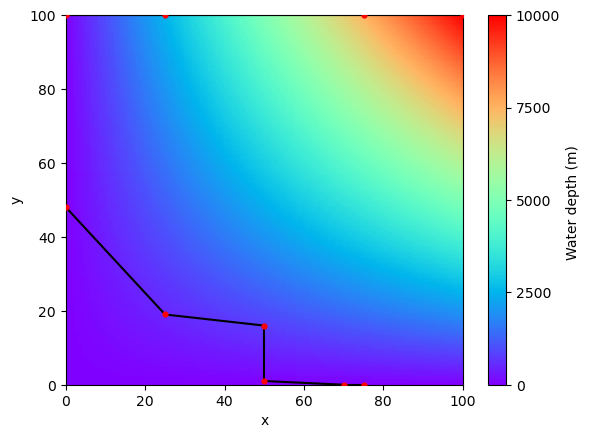

Simulation 106 of 148
Fitness score: -292624
Wind angle: 180
Number of turbines: 10

Generations: 3
Solutions per generation: 4
Parents mating: 1
Parents kept: 0
Mutation percentage: 10


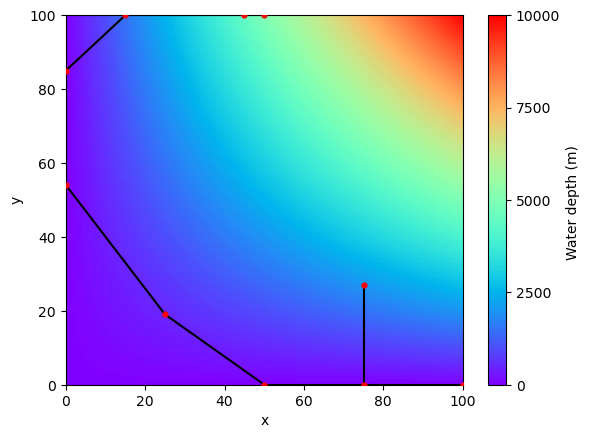

Simulation 107 of 148
Fitness score: -321851
Wind angle: 0
Number of turbines: 10

Generations: 3
Solutions per generation: 4
Parents mating: 1
Parents kept: 0
Mutation percentage: 10


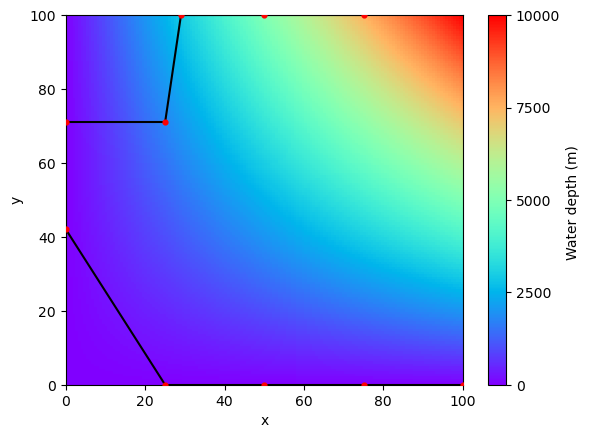

Simulation 108 of 148
Fitness score: -303429
Wind angle: 0
Number of turbines: 10

Generations: 3
Solutions per generation: 4
Parents mating: 1
Parents kept: 0
Mutation percentage: 10


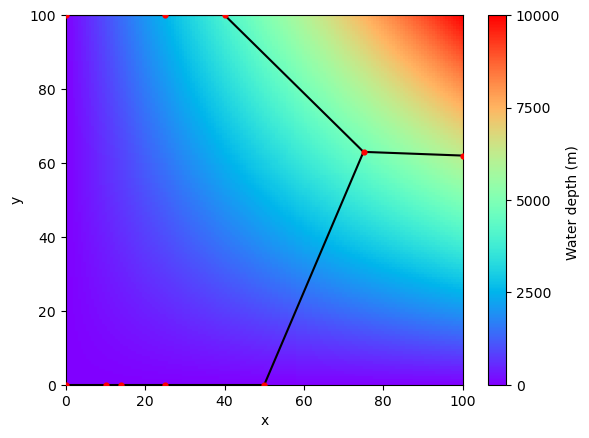

Simulation 109 of 148
Fitness score: -92805
Wind angle: 0
Number of turbines: 10

Generations: 1000
Solutions per generation: 4
Parents mating: 1
Parents kept: 0
Mutation percentage: 10


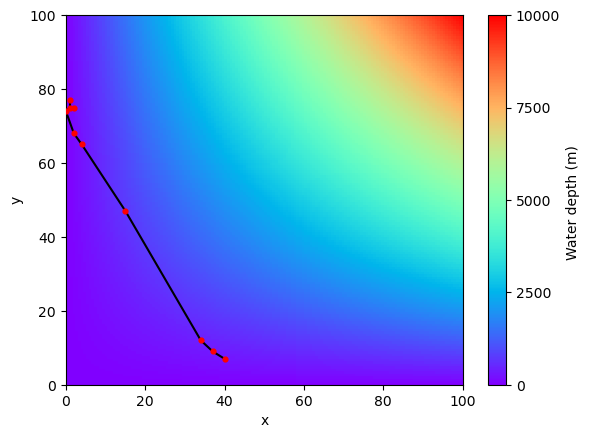

Simulation 110 of 148
Fitness score: -19245
Wind angle: 0
Number of turbines: 10

Generations: 1000
Solutions per generation: 10
Parents mating: 1
Parents kept: 0
Mutation percentage: 10


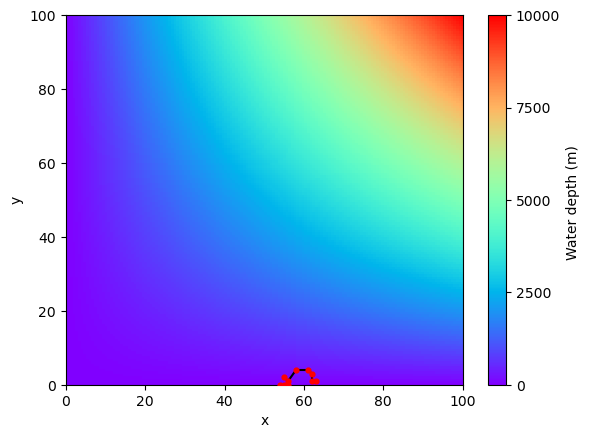

Simulation 111 of 148
Fitness score: -34718
Wind angle: 0
Number of turbines: 10

Generations: 1000
Solutions per generation: 10
Parents mating: 1
Parents kept: 0
Mutation percentage: 10


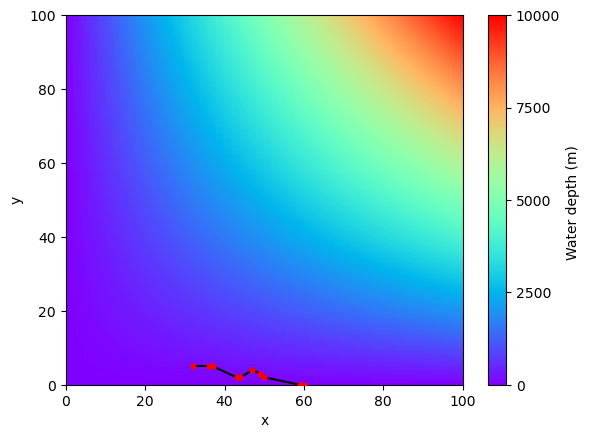

Simulation 112 of 148
Fitness score: -31113
Wind angle: 0
Number of turbines: 10

Generations: 1000
Solutions per generation: 10
Parents mating: 1
Parents kept: 0
Mutation percentage: 10


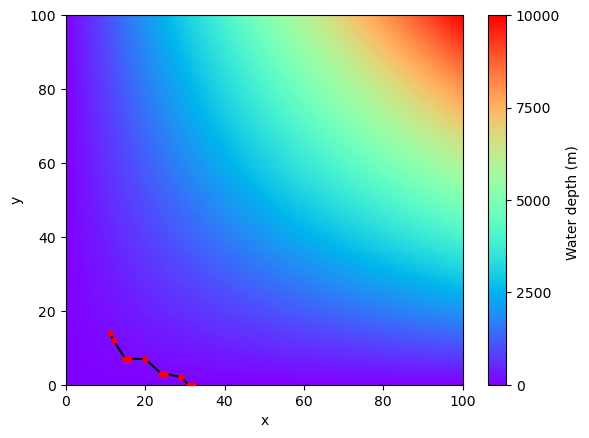

Simulation 113 of 148
Fitness score: -64047
Wind angle: 0
Number of turbines: 10

Generations: 1000
Solutions per generation: 10
Parents mating: 1
Parents kept: 0
Mutation percentage: 10


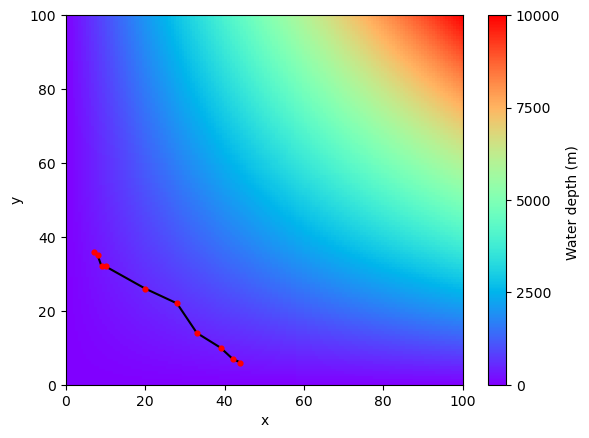

Simulation 114 of 148
Fitness score: -17774
Wind angle: 0
Number of turbines: 10

Generations: 1000
Solutions per generation: 10
Parents mating: 1
Parents kept: 0
Mutation percentage: 10


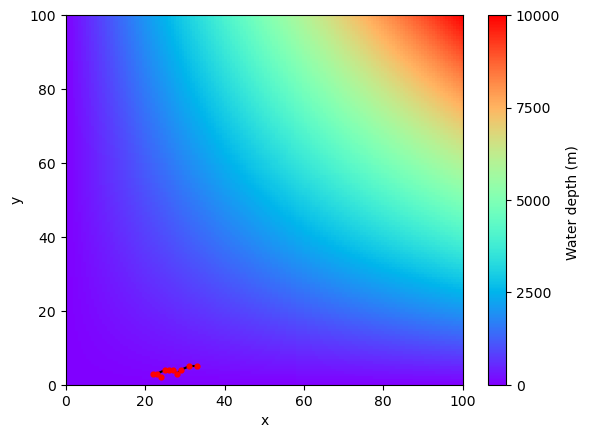

Simulation 115 of 148
Fitness score: -87585
Wind angle: 0
Number of turbines: 10

Generations: 1000
Solutions per generation: 10
Parents mating: 1
Parents kept: 0
Mutation percentage: 10


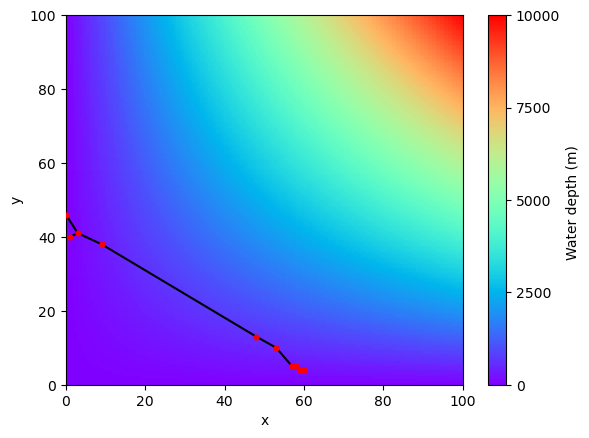

Simulation 116 of 148
Fitness score: -186467
Wind angle: 0
Number of turbines: 10

Generations: 10
Solutions per generation: 10
Parents mating: 1
Parents kept: 0
Mutation percentage: 10


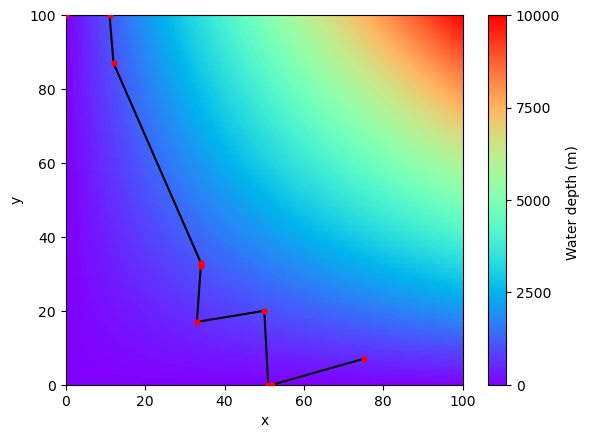

Simulation 117 of 148
Fitness score: -125734
Wind angle: 0
Number of turbines: 10

Generations: 10
Solutions per generation: 10
Parents mating: 1
Parents kept: 0
Mutation percentage: 10


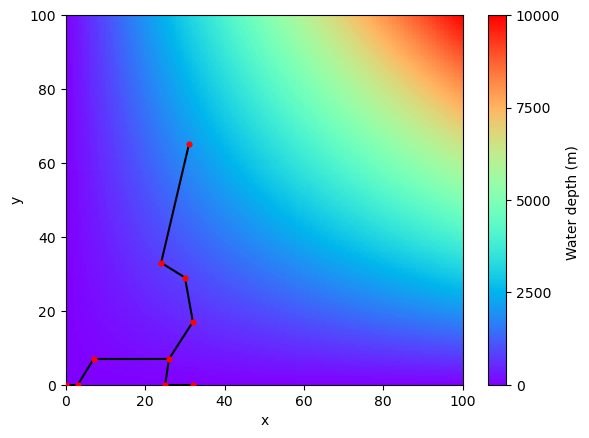

Simulation 118 of 148
Fitness score: -242908
Wind angle: 0
Number of turbines: 10

Generations: 10
Solutions per generation: 10
Parents mating: 1
Parents kept: 0
Mutation percentage: 10


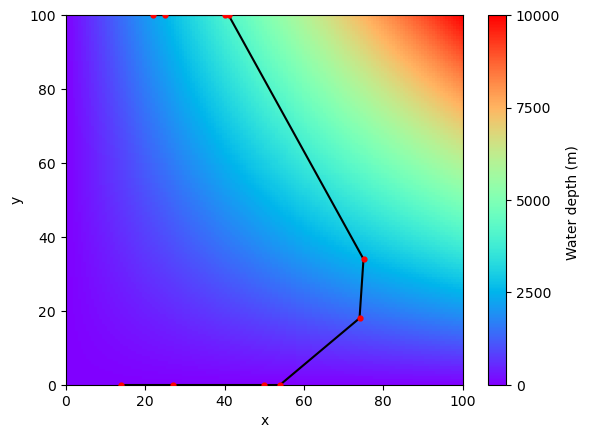

Simulation 119 of 148
Fitness score: -204995
Wind angle: 0
Number of turbines: 10

Generations: 10
Solutions per generation: 10
Parents mating: 1
Parents kept: 0
Mutation percentage: 10


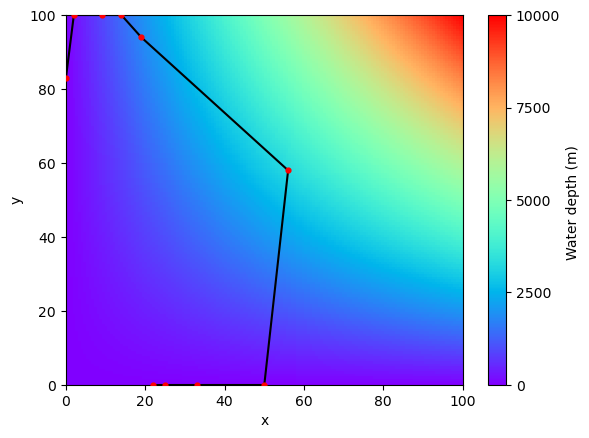

Simulation 120 of 148
Fitness score: -188934
Wind angle: 0
Number of turbines: 10

Generations: 10
Solutions per generation: 10
Parents mating: 1
Parents kept: 0
Mutation percentage: 10


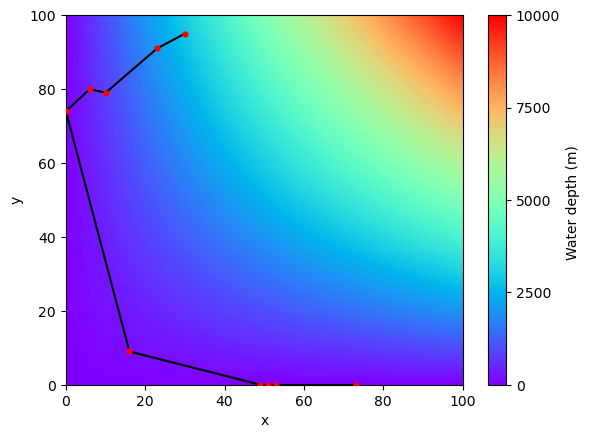

Simulation 121 of 148
Fitness score: -154019
Wind angle: 0
Number of turbines: 10

Generations: 10
Solutions per generation: 10
Parents mating: 1
Parents kept: 0
Mutation percentage: 10


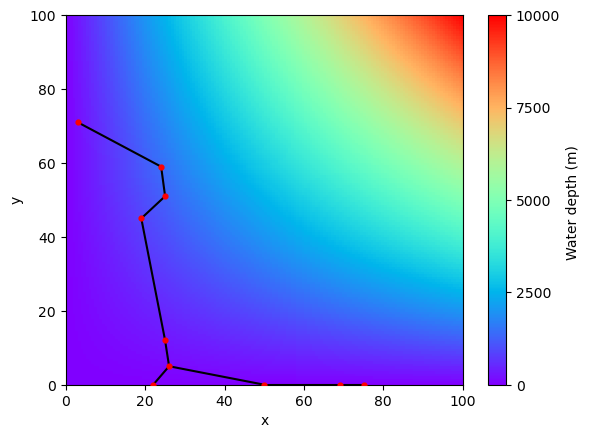

Simulation 122 of 148
Fitness score: -90884
Wind angle: 0
Number of turbines: 10

Generations: 10
Solutions per generation: 10
Parents mating: 1
Parents kept: 0
Mutation percentage: 10


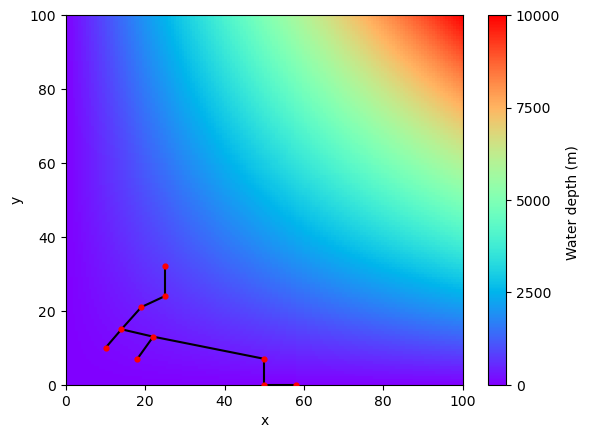

Simulation 123 of 148
Fitness score: -182837
Wind angle: 0
Number of turbines: 10

Generations: 10
Solutions per generation: 10
Parents mating: 1
Parents kept: 0
Mutation percentage: 10


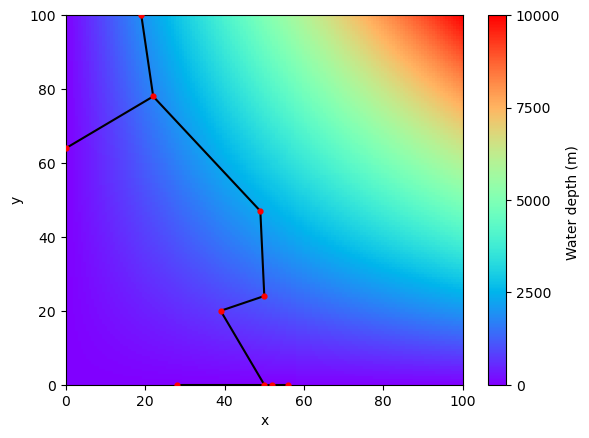

Simulation 124 of 148
Fitness score: -126947
Wind angle: 0
Number of turbines: 10

Generations: 10
Solutions per generation: 10
Parents mating: 1
Parents kept: 0
Mutation percentage: 10


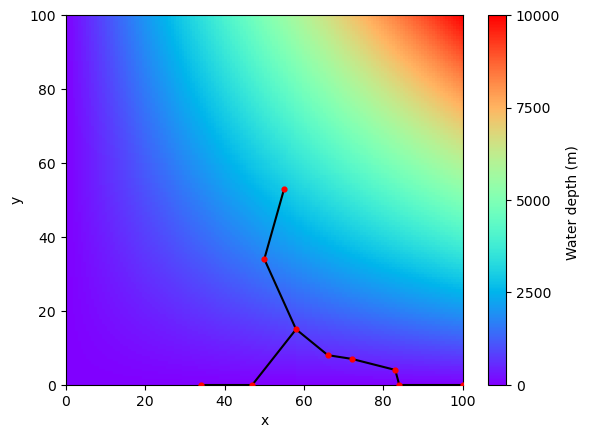

Simulation 125 of 148
Fitness score: -145365
Wind angle: 0
Number of turbines: 10

Generations: 10
Solutions per generation: 10
Parents mating: 1
Parents kept: 0
Mutation percentage: 10


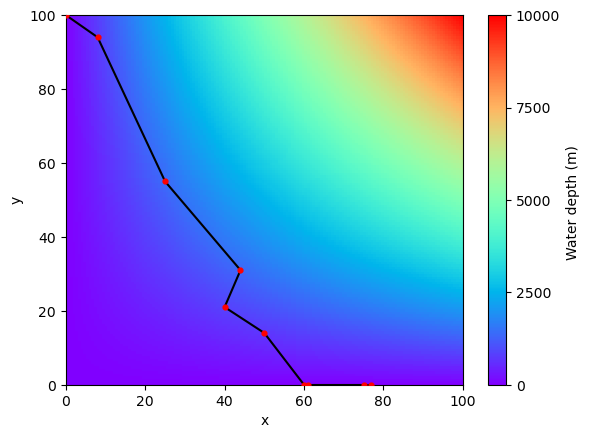

Simulation 126 of 148
Fitness score: -126985
Wind angle: 0
Number of turbines: 10

Generations: 10
Solutions per generation: 10
Parents mating: 1
Parents kept: 0
Mutation percentage: 10


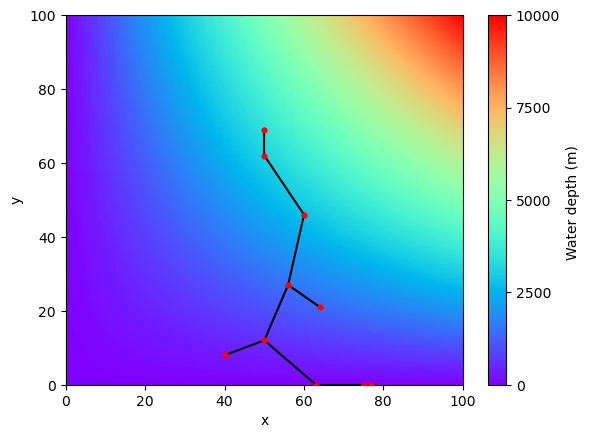

Simulation 127 of 148
Fitness score: -175592
Wind angle: 0
Number of turbines: 10

Generations: 10
Solutions per generation: 10
Parents mating: 1
Parents kept: 0
Mutation percentage: 10


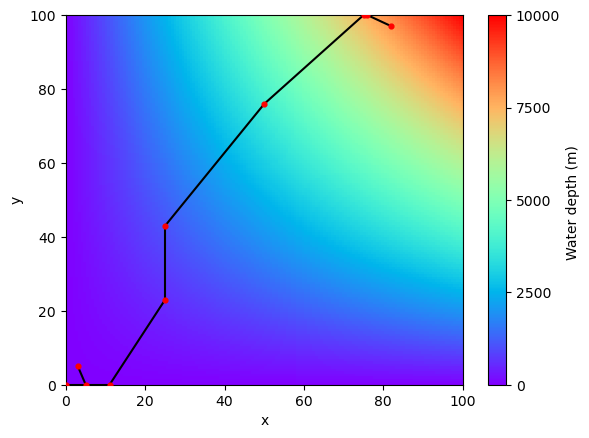

Simulation 128 of 148
Fitness score: -195409
Wind angle: 0
Number of turbines: 10

Generations: 10
Solutions per generation: 10
Parents mating: 1
Parents kept: 0
Mutation percentage: 10


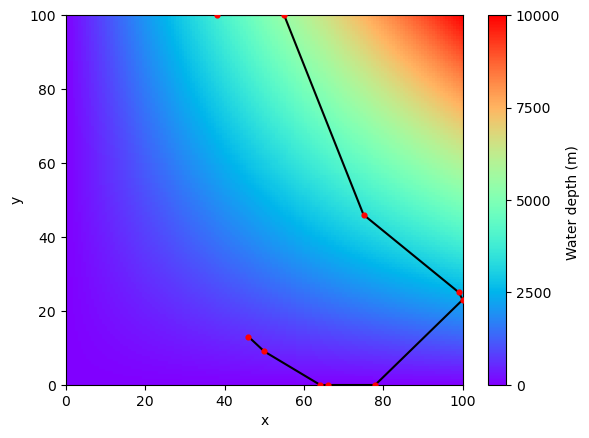

Simulation 129 of 148
Fitness score: -166399
Wind angle: 0
Number of turbines: 10

Generations: 10
Solutions per generation: 10
Parents mating: 1
Parents kept: 0
Mutation percentage: 10


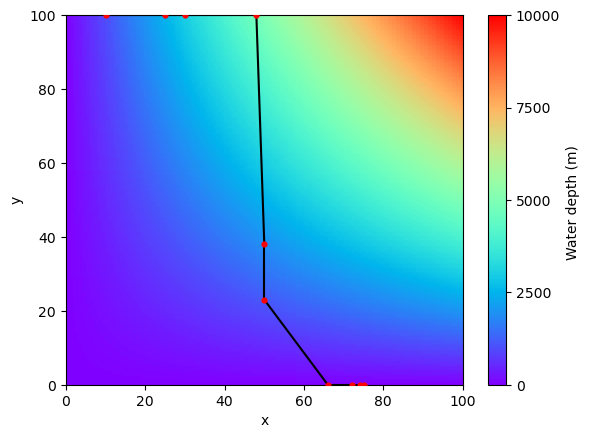

Simulation 130 of 148
Fitness score: -158245
Wind angle: 0
Number of turbines: 10

Generations: 10
Solutions per generation: 10
Parents mating: 1
Parents kept: 0
Mutation percentage: 10


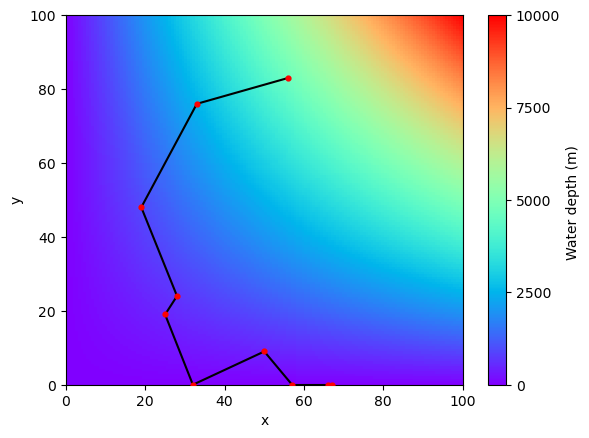

Simulation 131 of 148
Fitness score: -153749
Wind angle: 0
Number of turbines: 10

Generations: 10
Solutions per generation: 10
Parents mating: 1
Parents kept: 0
Mutation percentage: 10


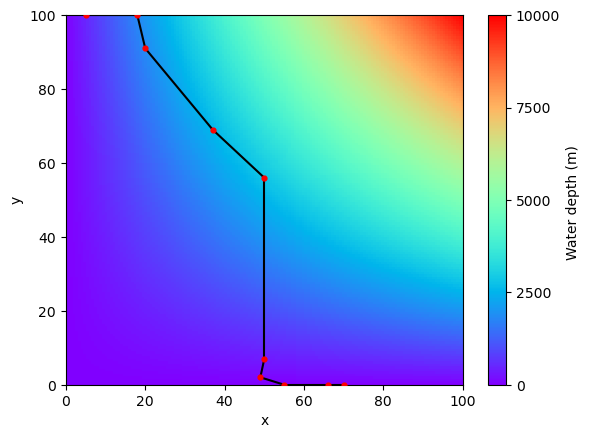

Simulation 132 of 148
Fitness score: -177511
Wind angle: 0
Number of turbines: 10

Generations: 10
Solutions per generation: 10
Parents mating: 1
Parents kept: 0
Mutation percentage: 10


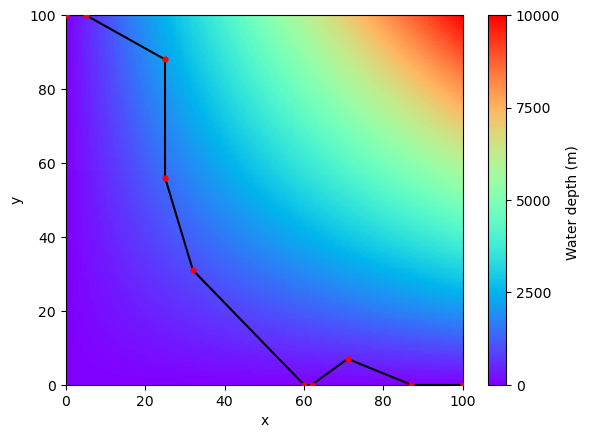

Simulation 133 of 148
Fitness score: -172733
Wind angle: 0
Number of turbines: 10

Generations: 10
Solutions per generation: 10
Parents mating: 1
Parents kept: 0
Mutation percentage: 10


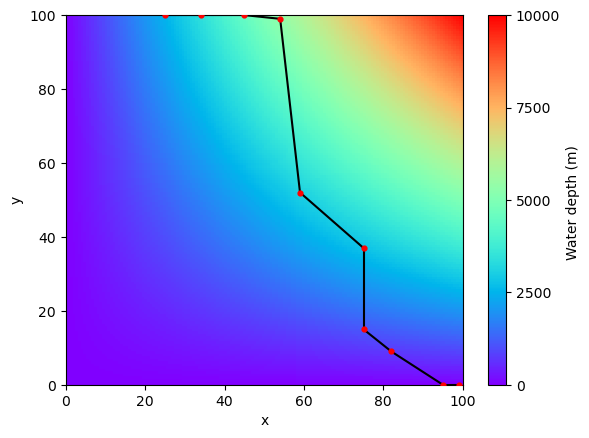

Simulation 134 of 148
Fitness score: -192643
Wind angle: 0
Number of turbines: 10

Generations: 10
Solutions per generation: 10
Parents mating: 1
Parents kept: 0
Mutation percentage: 10


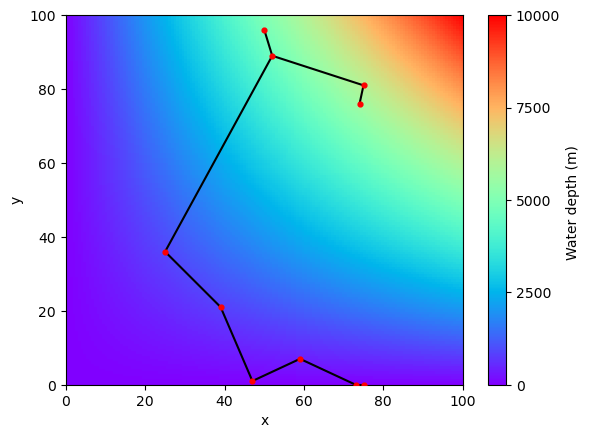

Simulation 135 of 148
Fitness score: -48752
Wind angle: 0
Number of turbines: 10

Generations: 1000
Solutions per generation: 10
Parents mating: 1
Parents kept: 0
Mutation percentage: 10


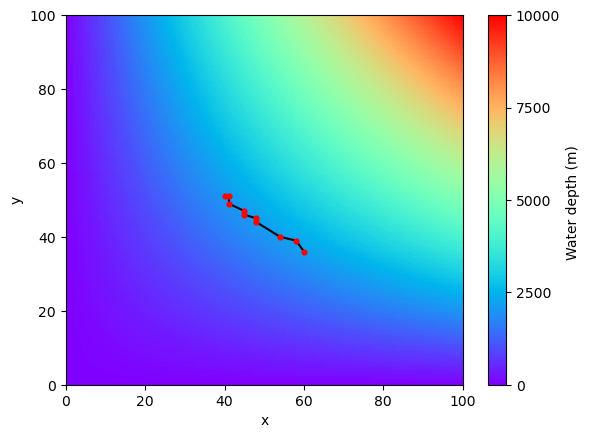

Simulation 136 of 148
Fitness score: -91047
Wind angle: 0
Number of turbines: 20

Generations: 1000
Solutions per generation: 30
Parents mating: 1
Parents kept: 0
Mutation percentage: 10


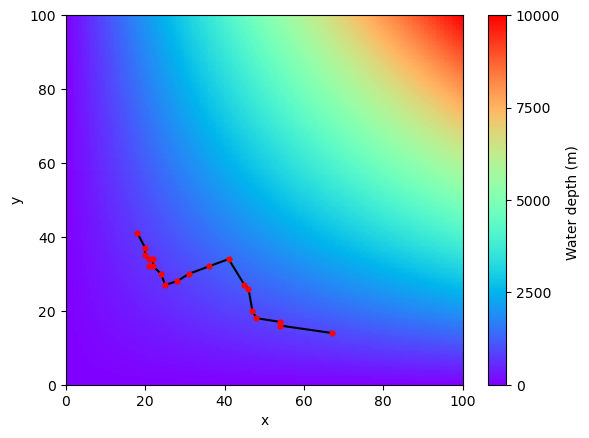

Simulation 137 of 148
Fitness score: -68687
Wind angle: 0
Number of turbines: 20

Generations: 1000
Solutions per generation: 30
Parents mating: 1
Parents kept: 0
Mutation percentage: 10


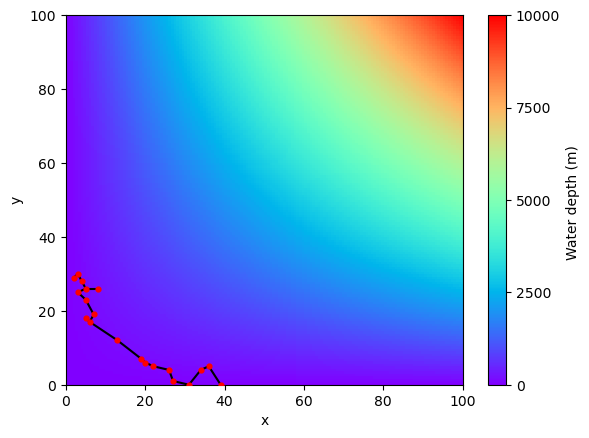

Simulation 138 of 148
Fitness score: -109824
Wind angle: 180
Number of turbines: 20

Generations: 1000
Solutions per generation: 30
Parents mating: 1
Parents kept: 0
Mutation percentage: 10


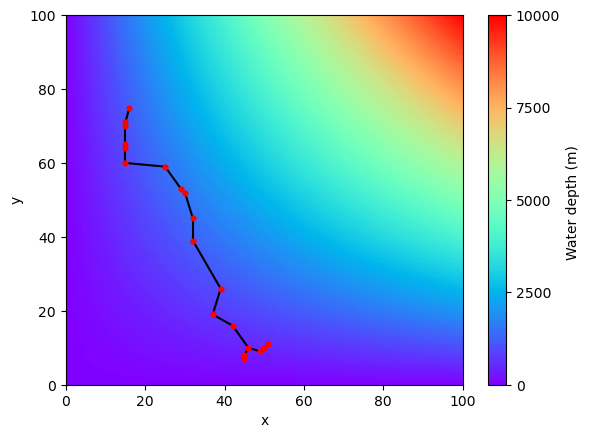

Simulation 139 of 148
Fitness score: -65931
Wind angle: 180
Number of turbines: 20

Generations: 1500
Solutions per generation: 50
Parents mating: 1
Parents kept: 0
Mutation percentage: 10


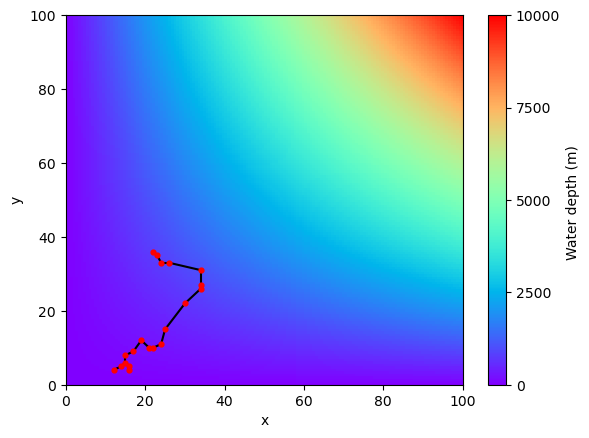

Simulation 140 of 148
Fitness score: -49198
Wind angle: 180
Number of turbines: 20

Generations: 1500
Solutions per generation: 50
Parents mating: 1
Parents kept: 0
Mutation percentage: 10


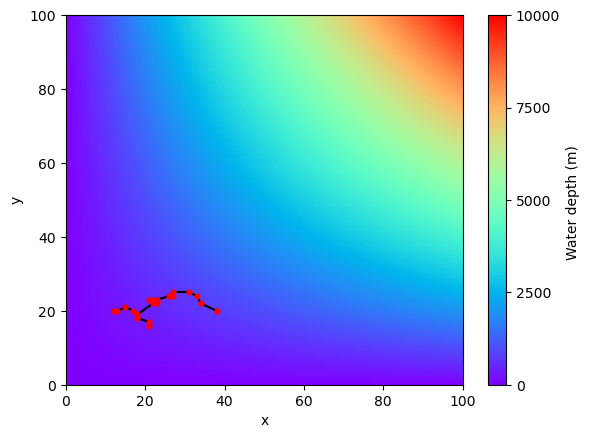

Simulation 141 of 148
Fitness score: -76235
Wind angle: 180
Number of turbines: 20

Generations: 500
Solutions per generation: 50
Parents mating: 1
Parents kept: 0
Mutation percentage: 10


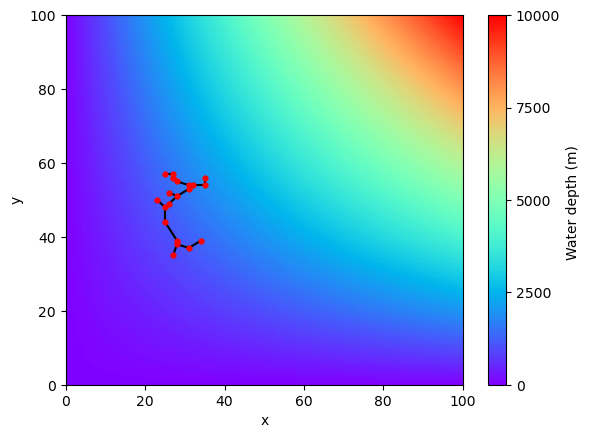

Simulation 142 of 148
Fitness score: -161406
Wind angle: 180
Number of turbines: 20

Generations: 50
Solutions per generation: 50
Parents mating: 1
Parents kept: 0
Mutation percentage: 10


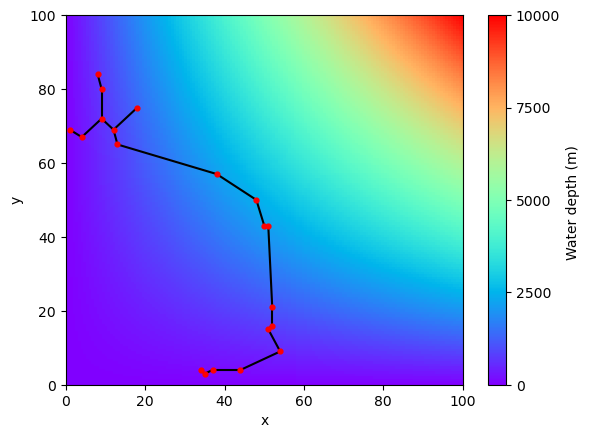

Simulation 143 of 148
Fitness score: -153963
Wind angle: 180
Number of turbines: 20

Generations: 50
Solutions per generation: 50
Parents mating: 1
Parents kept: 0
Mutation percentage: 10


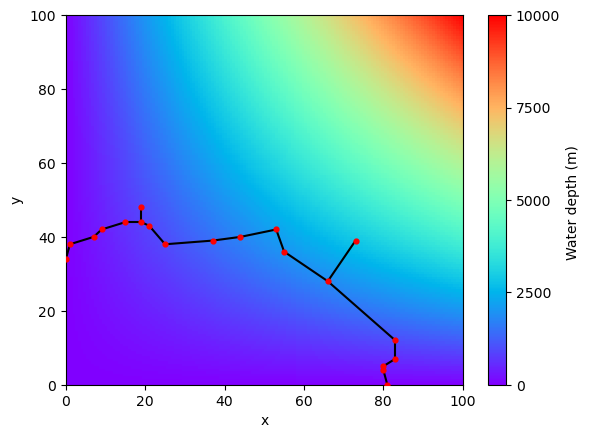

Simulation 144 of 148
Fitness score: -167071
Wind angle: 180
Number of turbines: 20

Generations: 50
Solutions per generation: 50
Parents mating: 1
Parents kept: 0
Mutation percentage: 10


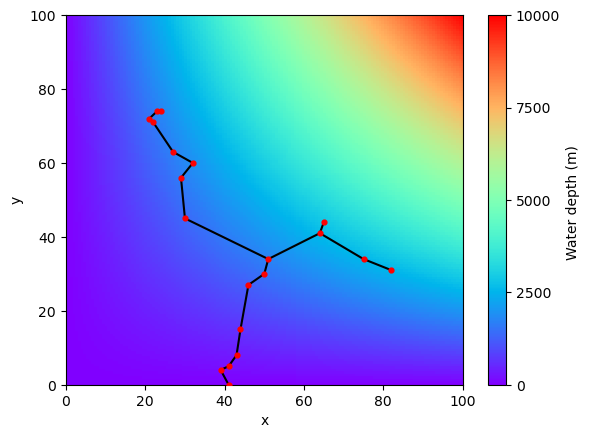

Simulation 145 of 148
Fitness score: -122609
Wind angle: 180
Number of turbines: 20

Generations: 50
Solutions per generation: 50
Parents mating: 1
Parents kept: 0
Mutation percentage: 10


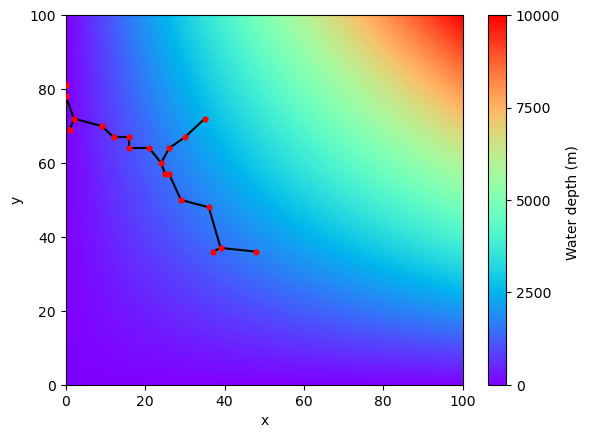

Simulation 146 of 148
Fitness score: -117813
Wind angle: 180
Number of turbines: 20

Generations: 50
Solutions per generation: 50
Parents mating: 1
Parents kept: 0
Mutation percentage: 10


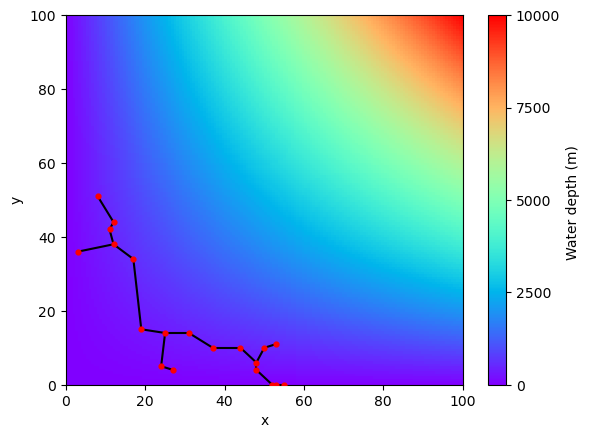

Simulation 147 of 148
Fitness score: -134264
Wind angle: 180
Number of turbines: 20

Generations: 50
Solutions per generation: 50
Parents mating: 1
Parents kept: 0
Mutation percentage: 10


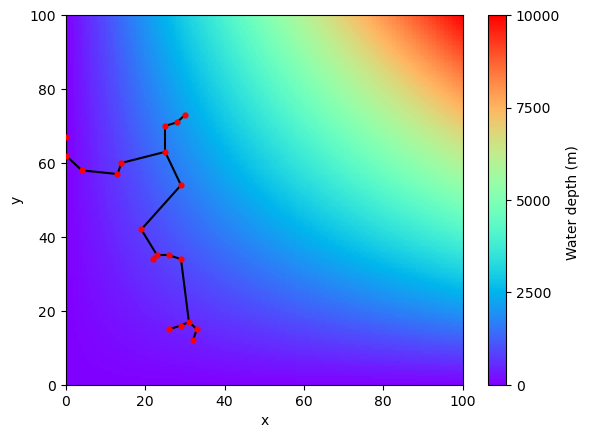

Simulation 148 of 148
Fitness score: -165691
Wind angle: 180
Number of turbines: 20

Generations: 50
Solutions per generation: 50
Parents mating: 1
Parents kept: 0
Mutation percentage: 10


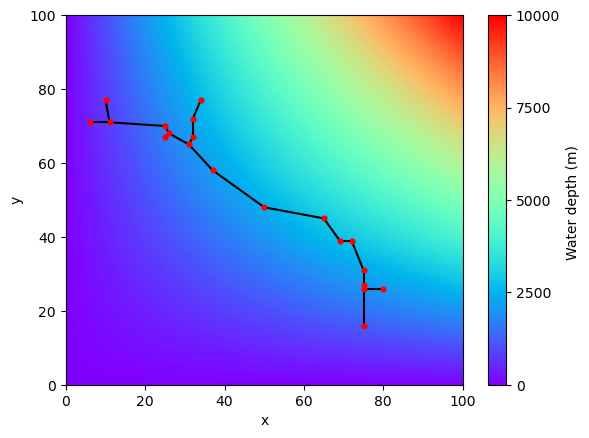

In [7]:
lastRow = sheet1.range('A' + str(sheet1.cells.last_cell.row)).end('up').row
params = sheet1.range("A2:H"+str(lastRow)).value
numTests = lastRow-1

# Formats data correctly if only one simulation present
if numTests == 1:
    params = [params]

for test in range (0,numTests):
    row = test+2
    lastColumn = sheet1["A"+str(row)].expand("right").last_cell.address.split("$")[1]    
    rowCoords = np.array(sheet1.range("I"+str(row)+":"+str(lastColumn)+str(row)).value)   
    
    numTurbs = int(params[test][0])
    windAngle = int(params[test][1])
    fitness = int(params[test][2])
    generations = int(params[test][3])
    parentsMating = int(params[test][4])
    solutions = int(params[test][5])
    parentsKept = int(params[test][6])
    mutationPercent = int(params[test][7])
    solutionCoords = np.reshape(rowCoords, (-1, 2))
    
    # Find the optimum cable routing for this layout
    distance=geomAnalysis(solutionCoords)
    MSTweight,links=minimumSpanningTree(distance,numTurbs)
    
    print(f"Simulation {test+1} of {numTests}")
    print(f"Fitness score: {fitness}")
    print(f"Wind angle: {windAngle}")
    print(f"Number of turbines: {numTurbs}")
    print()
    print(f"Generations: {generations}")
    print(f"Solutions per generation: {solutions}")
    print(f"Parents mating: {parentsMating}")
    print(f"Parents kept: {parentsKept}")
    print(f"Mutation percentage: {mutationPercent}")
    
    # Create a figure
    plt.figure()
    # Get the current figure and axis
    fig = plt.gcf()
    ax = plt.gca()
    # Generate the colourbar
    norm = plt.Normalize(np.amin(depths),np.amax(depths))
    sm = plt.cm.ScalarMappable(norm=norm, cmap=colormap)
    cbar = fig.colorbar(sm,ax=ax,label="Water depth (m) ") 
    # Set the colourbar to show the scale in intervals of 1/5 the depth range
    cbar.set_ticks([minDepth,minDepth+rangeDepth*1/4,minDepth+rangeDepth*2/4,minDepth+rangeDepth*3/4,maxDepth])
    # Plot the colourmesh of depths against x and y
         
    plt.pcolormesh(x,y,colors)
    # Plot the cable route
    for i in links:
        plt.plot(solutionCoords[i[:],0],solutionCoords[i[:],1],color = 'k') 
    # Plot the turbine positions
    plt.scatter(solutionCoords[:,0], solutionCoords[:,1],pointSize,color = 'r',zorder=10)
    plt.xlim(0,xDimension)
    plt.ylim(0,yDimension)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("")
    plt.show()